In [ ]:
# Correlation analysis: 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad

In [2]:
import muon as mu

In [3]:
# Import a module with ATAC-seq-related functions
from muon import atac as ac

In [ ]:
#useful functions: 

#atac = mdata['atac']

#def gofr(chreg):
#    df1 = atac.uns['atac']['peak_annotation'][atac.uns['atac']['peak_annotation']['peak'].str.contains(chreg)]
  #  return df1

#def findgene(inchrlist):
#    for i in inchrlist: 
#        print(gofr(i))

#def findcreg(geneid): 
#    df1 = atac.uns['atac']['peak_annotation'][atac.uns['atac']['peak_annotation'].index.str.contains(geneid)]
#    return df1 

In [ ]:
# bed file containing tf binding sites on chromatin data: 
#import pyranges as pr
#dfr = pr.read_bed('/corgi/filippe/libsall/AGG1/outs/analysis/tf_analysis/peak_motif_mapping.bed', as_df=True)

# useful functions for tfs: 
#def findtf(chreg):
##    df1 = dfr[dfr['Name'].str.contains(chreg)]
#    return df1

#def tfget(tf): 
#    tfa = dfr[dfr['Start'] == tf]
#    return tfa
# example: 
# findtf('Arid3a_MA0151.1')




In [4]:
# all cells: 
mdata = mu.read('/corgi/filippe/FromHome/corranalysis/radata.h5mu')
mdata

MuData object with n_obs × n_vars = 10034 × 122758
  obs:	'leiden_joint', 'few_clusters', 'other_clusters'
  var:	'dispersions', 'dispersions_norm', 'feature_types', 'gene_ids', 'genome', 'highly_variable', 'highly_variable_intersection', 'highly_variable_nbatches', 'interval', 'mean', 'mean_counts', 'means', 'n_cells', 'n_cells_by_counts', 'pct_dropout_by_counts', 'std', 'total_counts'
  obsm:	'X_mofa', 'X_umap'
  varm:	'LFs'
  obsp:	'connectivities', 'distances'
  2 modalities
    atac:	10034 x 115592
      obs:	'n_genes_by_counts', 'total_counts', 'n_genes', 'NS', 'nucleosome_signal', 'tss_score', 'n_counts', 'batchname', 'leiden', 'rna_celltype', 'leiden_joint', 'other_clusters'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
      uns:	'atac', 'batchname_colors', 'dendrogram_leiden', 'dendrogram_rna_celltype', 'files', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'other_clusters_colors', 'pca', 'rank_genes_groups', 'rna_celltype_colors', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    rna:	10034 x 7166
      obs:	'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'celltype', 'leiden_joint', 'other_clusters', 'res1_clustering', 'res0.5_clustering', 'res0.7_clustering'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
      uns:	'batchname_colors', 'cellcycle_colors', 'celltype_colors', 'dendrogram_celltype', 'dendrogram_leiden', 'dendrogram_res1_clustering', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'other_clusters_colors', 'pca', 'rank_genes_groups', 'res0.5_clustering_colors', 'res0.7_clustering_colors', 'res1_clustering_colors', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'

In [5]:
mdata['rna'].raw

In [6]:
mdata['rna'].raw.var

,gene_ids,feature_types,genome,interval,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,chr1:120931-133723,37,False,37,0.003229,99.685641,38.0,False,0.003699,-0.135349,-0.543269,0,False
AL627309.5,ENSG00000241860,Gene Expression,GRCh38,chr1:149706-173862,116,False,116,0.009856,99.014444,116.0,False,0.007692,-0.064770,-0.431118,0,False
AL627309.4,ENSG00000241599,Gene Expression,GRCh38,chr1:160445-160446,11,False,11,0.000935,99.906542,11.0,False,0.000880,-0.283426,-0.738261,0,False
AL669831.2,ENSG00000229905,Gene Expression,GRCh38,chr1:760910-760911,5,False,5,0.000425,99.957519,5.0,False,0.000363,-0.362497,-0.767411,0,False
LINC01409,ENSG00000237491,Gene Expression,GRCh38,chr1:778757-803934,867,False,867,0.083942,92.633815,988.0,False,0.064575,0.050150,-0.259835,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC240274.1,ENSG00000271254,Gene Expression,GRCh38,KI270711.1:24649-29626,54,False,54,0.004673,99.541206,55.0,False,0.004214,-0.111410,-0.497452,0,False
AC004556.3,ENSG00000276345,Gene Expression,GRCh38,KI270721.1:2584-2585,74,False,74,0.007052,99.371283,83.0,False,0.004426,-0.064486,-0.427539,0,False
AC233755.2,ENSG00000277856,Gene Expression,GRCh38,KI270726.1:26240-26241,24,False,24,0.002124,99.796092,25.0,False,0.001491,-0.083860,-0.460026,0,False
AC233755.1,ENSG00000275063,Gene Expression,GRCh38,KI270726.1:41443-41444,16,False,16,0.002719,99.864061,32.0,False,0.001587,0.247416,0.020898,0,False


In [7]:
mdata['rna'].to_df()

,LINC01128,ISG15,C1orf159,SDF4,ACAP3,AURKAIP1,CCNL2,MRPL20,ATAD3B,SSU72,...,CMC4,VBP1,RAB39B,TMLHE-AS1,TMLHE,VAMP7,ZFY,MT-ND4L,MT-ND6,AL592183.1
AAACAGCCAAGATTCT-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,1.074615,-0.381410,0.193030,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,0.192612,-0.263229,-0.079372,-0.414940,-0.082820,-0.350879
AAACAGCCAATATACC-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,3.692045,-0.161463,2.529190,...,-0.131234,-0.243108,-0.108068,2.777642,3.542053,-0.263229,-0.079372,1.246675,-0.569847,-0.350879
AAACAGCCAGTACCGT-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,2.439528,-0.381410,1.805466,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,-1.159973,-0.569847,-0.350879
AAACAGCCATTGTGGC-1,-0.165226,-0.232669,-0.231944,-0.267128,1.880199,2.391885,-0.381410,0.843237,-0.161463,1.550718,...,-0.131234,-0.243108,-0.108068,0.496890,0.264151,0.766644,-0.079372,-0.135346,1.160963,-0.350879
AAACATGCAACGTGCT-4,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,-0.423457,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,1.147914,-0.569847,-0.350879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,2.708092,3.819819,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,0.120159,-0.569847,-0.350879
TTTGTGTTCGCTAGAT-4,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,2.881158,-0.423457,-0.161463,2.809488,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,4.043496,-0.079372,1.794645,-0.569847,2.975671
TTTGTTGGTAACCTAG-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,-0.423457,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,-0.193990,-0.569847,-0.350879
TTTGTTGGTCGCAATA-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,1.764577,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,-1.159973,-0.569847,2.167192


In [ ]:
hvmrna[hvmrna['ISG15']]

In [250]:
sum(hvmrna['ISG15'])

-48.652625262737274

In [8]:
hvmrna = mdata['rna'].to_df()

In [9]:
hvmrna

,LINC01128,ISG15,C1orf159,SDF4,ACAP3,AURKAIP1,CCNL2,MRPL20,ATAD3B,SSU72,...,CMC4,VBP1,RAB39B,TMLHE-AS1,TMLHE,VAMP7,ZFY,MT-ND4L,MT-ND6,AL592183.1
AAACAGCCAAGATTCT-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,1.074615,-0.381410,0.193030,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,0.192612,-0.263229,-0.079372,-0.414940,-0.082820,-0.350879
AAACAGCCAATATACC-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,3.692045,-0.161463,2.529190,...,-0.131234,-0.243108,-0.108068,2.777642,3.542053,-0.263229,-0.079372,1.246675,-0.569847,-0.350879
AAACAGCCAGTACCGT-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,2.439528,-0.381410,1.805466,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,-1.159973,-0.569847,-0.350879
AAACAGCCATTGTGGC-1,-0.165226,-0.232669,-0.231944,-0.267128,1.880199,2.391885,-0.381410,0.843237,-0.161463,1.550718,...,-0.131234,-0.243108,-0.108068,0.496890,0.264151,0.766644,-0.079372,-0.135346,1.160963,-0.350879
AAACATGCAACGTGCT-4,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,-0.423457,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,1.147914,-0.569847,-0.350879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,2.708092,3.819819,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,0.120159,-0.569847,-0.350879
TTTGTGTTCGCTAGAT-4,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,2.881158,-0.423457,-0.161463,2.809488,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,4.043496,-0.079372,1.794645,-0.569847,2.975671
TTTGTTGGTAACCTAG-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,-0.423457,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,-0.193990,-0.569847,-0.350879
TTTGTTGGTCGCAATA-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,1.764577,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,-1.159973,-0.569847,2.167192


In [10]:
# b cell only: 

tfbd = ad.read('/corgi/filippe/FromHome/corranalysis/tfdf.h5ad', backed = False)

In [11]:
tfbd

AnnData object with n_obs × n_vars = 8980 × 746
    obs: 'batchname', 'rna_celltype', 'leiden', 'merged'
    var: 'gene_ids', 'TF hetero-dimer', 'TF only', 'tfisgene', 'NON empty', 'ndgenes', 'variant_T', 'everyc', 'c_of_ndgenes', 'newest', 'isgene'
    uns: 'leiden_colors', 'rna_celltype_colors'
    obsm: 'X_pca', 'X_umap'

In [249]:
tfbd.to_df()

,Arnt_MA0004.1,Ahr::Arnt_MA0006.1,Ddit3::Cebpa_MA0019.1,Mecom_MA0029.1,FOXF2_MA0030.1,FOXD1_MA0031.1,Foxq1_MA0040.1,Foxd3_MA0041.1,IRF2_MA0051.1,MZF1(var.2)_MA0057.1,...,TEAD1_MA0090.3,TEAD4_MA0809.2,TFAP2A_MA0003.4,TFAP2C(var.2)_MA0814.2,TWIST1_MA1123.2,USF1_MA0093.3,USF2_MA0526.3,YY2_MA0748.2,ZNF263_MA0528.2,CREM_MA0609.2
AAACAGCCAAGATTCT-3,1.839727,-0.049426,0.844747,0.623760,0.289840,-0.708935,0.350592,0.162483,4.148801,-0.438510,...,0.147121,-0.668773,1.097211,-0.121122,0.995895,-0.630180,-0.591211,0.375547,-0.554930,0.268788
AAACAGCCAATATACC-3,1.271281,0.681847,-0.059256,-0.377563,-0.759532,-0.752887,-2.170156,1.221169,-0.075256,-1.327228,...,0.323312,-0.262888,1.167484,1.546561,-0.811438,0.081377,0.164375,0.497178,0.264662,-1.131204
AAACAGCCATTGTGGC-1,0.138258,-1.147398,0.344882,0.093980,-0.914906,-0.693802,0.838554,-1.049149,2.859989,-1.963731,...,-1.704759,-2.826330,-0.801648,-0.568401,3.194555,-0.610875,-0.966530,-1.486532,-1.316479,-2.057571
AAACATGCAACGTGCT-4,-0.034799,0.976503,0.460473,0.271541,0.038646,-0.980819,-0.326594,1.077932,-0.174728,0.772797,...,0.472390,0.285944,0.503311,0.748665,0.330925,-2.398958,-2.628583,-0.074301,1.561133,-0.452781
AAACATGCAATGAAGC-1,1.750616,0.888063,0.674287,1.111676,-0.056561,-0.188282,0.741897,1.148726,1.196290,0.033659,...,0.733262,1.002241,1.863672,1.307810,-0.324444,0.864195,0.856518,1.700627,0.012511,-0.250312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCATGGTTA-4,1.421539,-0.142536,1.311749,0.018023,0.102464,-0.232652,1.122738,0.194984,1.287621,-0.377945,...,-1.491894,-0.844348,-0.936474,-0.537326,-0.772308,-2.114341,-1.788647,-1.286700,-0.305036,1.227416
TTTGTGTTCCTCACTA-4,0.421155,-1.134060,0.822241,-0.290081,1.124028,-0.036775,-1.774409,-1.064547,-0.452217,-1.135337,...,0.140837,0.400954,0.962347,0.396561,-0.153527,0.014923,0.043853,0.433973,-1.075246,-0.340778
TTTGTGTTCGCTAAAC-1,-0.350634,0.865854,0.226183,-0.740192,-0.548908,-1.099411,1.355198,0.166682,2.316345,1.683800,...,0.511417,0.423249,0.094424,0.037098,1.112479,2.546505,1.916861,0.727985,1.435201,2.017326
TTTGTGTTCGCTAGAT-4,-0.981712,0.460658,-0.694264,-1.354767,-0.365683,0.265481,-1.088719,1.212376,-1.545625,-0.691931,...,-0.187207,-0.756879,0.571314,0.437827,0.352540,0.266632,0.098191,0.982622,-0.061216,-0.036730


In [12]:
# mdata['rna'].raw.to_df()
18184692/10034

1812.3073549930236

In [61]:
#mat = mdata['rna'].raw.X.todense()

<10034x25577 sparse matrix of type '<class 'numpy.float32'>'
	with 18184692 stored elements in Compressed Sparse Row format>

In [13]:
mat = mdata['rna'].raw.X.todense()

In [14]:
mat.shape

(10034, 25577)

In [ ]:
#mdata['rna']

In [ ]:
# create df for mdata raw: 

In [15]:
gn = list(mdata['rna'].raw.var.index)

In [16]:
barcodes = list(mdata['rna'].obs.index)

In [17]:
rnadf = pd.DataFrame(data=mat, columns= gn, index= barcodes)

In [18]:
rnadf

,AL627309.1,AL627309.5,AL627309.4,AL669831.2,LINC01409,FAM87B,LINC01128,LINC00115,FAM41C,AL645608.6,...,AC145212.1,MAFIP,AC011043.1,AL354822.1,AL592183.1,AC240274.1,AC004556.3,AC233755.2,AC233755.1,AC007325.4
AAACAGCCAAGATTCT-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
AAACAGCCAATATACC-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
AAACAGCCAGTACCGT-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
AAACAGCCATTGTGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.200576,0.200576,0.0,0.0
AAACATGCAACGTGCT-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
TTTGTGTTCGCTAGAT-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.838767,0.0,0.000000,0.000000,0.0,0.0
TTTGTTGGTAACCTAG-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
TTTGTTGGTCGCAATA-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.634915,0.0,0.000000,0.000000,0.0,0.0


In [19]:
# all cells

cvar = mu.read('/corgi/filippe/FromHome/corranalysis/bcellcvar-Copy1.h5mu')

/home/filippe/.local/lib/python3.8/site-packages/mudata/_core/mudata.py:376: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [20]:
cvar

MuData object with n_obs × n_vars = 10034 × 1492
  2 modalities
    tfraw:	10034 x 746
      obs:	'batchname', 'n_genes_by_counts', 'total_counts', 'rna_celltype'
      var:	'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'bindingsite_counts'
      uns:	'dendrogram_rna_celltype', 'hvg', 'rank_genes_groups', 'rna_celltype_colors'
      obsm:	'X_pca', 'X_umap'
    zcvar:	10034 x 746
      obs:	'batchname'
      var:	'gene_ids'
      obsm:	'X_pca', 'X_umap'

In [21]:
tfbd.var[tfbd.var['newest'] != 'Nogenes']

,gene_ids,TF hetero-dimer,TF only,tfisgene,NON empty,ndgenes,variant_T,everyc,c_of_ndgenes,newest,isgene
Arnt_MA0004.1,Arnt_MA0004.1,0,Arnt,0,1,ARNT,0,0,ARNT,ARNT,1
Mecom_MA0029.1,Mecom_MA0029.1,0,Mecom,0,1,MECOM,0,0,MECOM,MECOM,1
FOXD1_MA0031.1,FOXD1_MA0031.1,0,FOXD1,1,1,FOXD1,0,0,FOXD1,FOXD1,1
IRF2_MA0051.1,IRF2_MA0051.1,0,IRF2,1,1,IRF2,0,0,IRF2,IRF2,1
MZF1(var.2)_MA0057.1,MZF1(var.2)_MA0057.1,0,MZF1(var.2),0,0,Nogenes,1,1,Nogenes,MZF1,0
...,...,...,...,...,...,...,...,...,...,...,...
USF1_MA0093.3,USF1_MA0093.3,0,USF1,1,1,USF1,0,0,USF1,USF1,1
USF2_MA0526.3,USF2_MA0526.3,0,USF2,1,1,USF2,0,0,USF2,USF2,1
YY2_MA0748.2,YY2_MA0748.2,0,YY2,0,1,YY2,0,0,YY2,YY2,0
ZNF263_MA0528.2,ZNF263_MA0528.2,0,ZNF263,1,1,ZNF263,0,0,ZNF263,ZNF263,1


In [22]:
tfbd.var['gene_ids'][:]

Arnt_MA0004.1                    Arnt_MA0004.1
Ahr::Arnt_MA0006.1          Ahr::Arnt_MA0006.1
Ddit3::Cebpa_MA0019.1    Ddit3::Cebpa_MA0019.1
Mecom_MA0029.1                  Mecom_MA0029.1
FOXF2_MA0030.1                  FOXF2_MA0030.1
                                 ...          
USF1_MA0093.3                    USF1_MA0093.3
USF2_MA0526.3                    USF2_MA0526.3
YY2_MA0748.2                      YY2_MA0748.2
ZNF263_MA0528.2                ZNF263_MA0528.2
CREM_MA0609.2                    CREM_MA0609.2
Name: gene_ids, Length: 746, dtype: object

In [23]:
cvar['zcvar'].var['TF_only'] = tfbd.var['TF only']

In [24]:
cvar['zcvar'].var['Gene'] = tfbd.var['newest']

In [25]:
cvar['zcvar'].var

,gene_ids,TF_only,Gene
Arnt_MA0004.1,Arnt_MA0004.1,Arnt,ARNT
Ahr::Arnt_MA0006.1,Ahr::Arnt_MA0006.1,Ahr::Arnt,Nogenes
Ddit3::Cebpa_MA0019.1,Ddit3::Cebpa_MA0019.1,Ddit3::Cebpa,Nogenes
Mecom_MA0029.1,Mecom_MA0029.1,Mecom,MECOM
FOXF2_MA0030.1,FOXF2_MA0030.1,FOXF2,Nogenes
...,...,...,...
USF1_MA0093.3,USF1_MA0093.3,USF1,USF1
USF2_MA0526.3,USF2_MA0526.3,USF2,USF2
YY2_MA0748.2,YY2_MA0748.2,YY2,YY2
ZNF263_MA0528.2,ZNF263_MA0528.2,ZNF263,ZNF263


In [26]:
list(cvar['zcvar'].var[cvar['zcvar'].var['Gene'] != 'Nogenes']['gene_ids'])

['Arnt_MA0004.1',
 'Mecom_MA0029.1',
 'FOXD1_MA0031.1',
 'IRF2_MA0051.1',
 'MZF1(var.2)_MA0057.1',
 'PPARG_MA0066.1',
 'Pax2_MA0067.1',
 'PAX6_MA0069.1',
 'PBX1_MA0070.1',
 'RORA_MA0071.1',
 'RORA(var.2)_MA0072.1',
 'RREB1_MA0073.1',
 'SOX9_MA0077.1',
 'Sox5_MA0087.1',
 'REL_MA0101.1',
 'RELA_MA0107.1',
 'TBP_MA0108.2',
 'HLTF_MA0109.1',
 'Znf423_MA0116.1',
 'ZNF354C_MA0130.1',
 'Lhx3_MA0135.1',
 'CTCF_MA0139.1',
 'REST_MA0138.2',
 'RUNX1_MA0002.2',
 'Arid3a_MA0151.1',
 'NFATC2_MA0152.1',
 'NR4A2_MA0160.1',
 'PLAG1_MA0163.1',
 'Nr2e3_MA0164.1',
 'Zfx_MA0146.2',
 'Crx_MA0467.1',
 'FOS_MA0476.1',
 'FOSL2_MA0478.1',
 'FOXH1_MA0479.1',
 'Foxo1_MA0480.1',
 'Gfi1b_MA0483.1',
 'JUN_MA0488.1',
 'JUN(var.2)_MA0489.1',
 'JUND(var.2)_MA0492.1',
 'MEF2C_MA0497.1',
 'NR2C2_MA0504.1',
 'Nr5a2_MA0505.1',
 'NRF1_MA0506.1',
 'POU2F2_MA0507.1',
 'Sox6_MA0515.1',
 'Stat4_MA0518.1',
 'Stat6_MA0520.1',
 'Tcf12_MA0521.1',
 'TCF7L2_MA0523.1',
 'ZBTB33_MA0527.1',
 'ELK4_MA0076.2',
 'ESR2_MA0258.2',
 'IRF1_MA0

In [32]:
cvdf = cvar['zcvar'].to_df()
cvdf = cvdf.transpose()

In [33]:
cvdf

,AAACAGCCAAGATTCT-3,AAACAGCCAATATACC-3,AAACAGCCAGTACCGT-3,AAACAGCCATTGTGGC-1,AAACATGCAACGTGCT-4,AAACATGCAATGAAGC-1,AAACATGCACAGCCAT-4,AAACATGCACCTGCCT-4,AAACATGCAGCAACAG-3,AAACATGCAGCCTTGG-3,...,TTTGTGGCATACCCGG-3,TTTGTGGCATGTCAGC-1,TTTGTGTTCATGGCCA-1,TTTGTGTTCATGGTTA-4,TTTGTGTTCCTCACTA-4,TTTGTGTTCGCTAAAC-1,TTTGTGTTCGCTAGAT-4,TTTGTTGGTAACCTAG-3,TTTGTTGGTCGCAATA-3,TTTGTTGGTTGGATAT-4
Arnt_MA0004.1,1.839727,1.271281,-1.060049,0.138258,-0.034799,1.750616,3.364953,-1.073293,0.606864,-0.132091,...,-0.910851,-1.303799,0.113754,1.421539,0.421155,-0.350634,-0.981712,1.428377,-1.455687,0.499933
Ahr::Arnt_MA0006.1,-0.049426,0.681847,-0.665134,-1.147398,0.976503,0.888063,1.987677,-0.645375,-1.574492,1.083250,...,0.900229,0.174441,0.118370,-0.142536,-1.134060,0.865854,0.460658,0.951237,1.166870,-0.298373
Ddit3::Cebpa_MA0019.1,0.844747,-0.059256,-1.500100,0.344882,0.460473,0.674287,-0.276548,0.497362,-1.474155,0.298955,...,0.338911,-0.073907,0.164758,1.311749,0.822241,0.226183,-0.694264,-0.351161,-1.023031,0.385204
Mecom_MA0029.1,0.623760,-0.377563,0.240448,0.093980,0.271541,1.111676,1.180730,1.168110,-1.775362,-1.006062,...,0.253352,0.293341,3.113133,0.018023,-0.290081,-0.740192,-1.354767,0.493082,0.512055,0.085960
FOXF2_MA0030.1,0.289840,-0.759532,-0.109965,-0.914906,0.038646,-0.056561,0.937776,1.774934,0.386600,0.240903,...,0.997722,-0.656959,0.963522,0.102464,1.124028,-0.548908,-0.365683,0.078292,0.560762,-0.057847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USF1_MA0093.3,-0.630180,0.081377,-0.832831,-0.610875,-2.398958,0.864195,0.432589,0.891323,-1.012080,-0.632609,...,-3.508213,-0.136942,0.871837,-2.114341,0.014923,2.546505,0.266632,-1.119076,0.332404,-2.269557
USF2_MA0526.3,-0.591211,0.164375,0.243126,-0.966530,-2.628583,0.856518,0.263275,2.299278,-0.004378,-1.013720,...,-3.672325,-0.012246,0.087345,-1.788647,0.043853,1.916861,0.098191,0.342998,0.251250,-2.248078
YY2_MA0748.2,0.375547,0.497178,-0.355731,-1.486532,-0.074301,1.700627,0.318576,0.322121,-1.201818,1.064697,...,-2.636491,0.511485,-0.812453,-1.286700,0.433973,0.727985,0.982622,0.850313,-0.324580,1.490782
ZNF263_MA0528.2,-0.554930,0.264662,1.026430,-1.316479,1.561133,0.012511,-0.303075,0.294246,-0.362873,0.002602,...,-0.265613,1.040800,1.153863,-0.305036,-1.075246,1.435201,-0.061216,-1.670478,1.393474,0.224302


In [34]:
cvar

MuData object with n_obs × n_vars = 10034 × 1492
  2 modalities
    tfraw:	10034 x 746
      obs:	'batchname', 'n_genes_by_counts', 'total_counts', 'rna_celltype'
      var:	'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'bindingsite_counts'
      uns:	'dendrogram_rna_celltype', 'hvg', 'rank_genes_groups', 'rna_celltype_colors'
      obsm:	'X_pca', 'X_umap'
    zcvar:	10034 x 746
      obs:	'batchname'
      var:	'gene_ids', 'TF_only', 'Gene'
      obsm:	'X_pca', 'X_umap'

In [35]:
cvdf[cvdf.index == 'YY2_MA0748.2']

,AAACAGCCAAGATTCT-3,AAACAGCCAATATACC-3,AAACAGCCAGTACCGT-3,AAACAGCCATTGTGGC-1,AAACATGCAACGTGCT-4,AAACATGCAATGAAGC-1,AAACATGCACAGCCAT-4,AAACATGCACCTGCCT-4,AAACATGCAGCAACAG-3,AAACATGCAGCCTTGG-3,...,TTTGTGGCATACCCGG-3,TTTGTGGCATGTCAGC-1,TTTGTGTTCATGGCCA-1,TTTGTGTTCATGGTTA-4,TTTGTGTTCCTCACTA-4,TTTGTGTTCGCTAAAC-1,TTTGTGTTCGCTAGAT-4,TTTGTTGGTAACCTAG-3,TTTGTTGGTCGCAATA-3,TTTGTTGGTTGGATAT-4
YY2_MA0748.2,0.375547,0.497178,-0.355731,-1.486532,-0.074301,1.700627,0.318576,0.322121,-1.201818,1.064697,...,-2.636491,0.511485,-0.812453,-1.2867,0.433973,0.727985,0.982622,0.850313,-0.32458,1.490782


In [39]:
ingenedf = cvar['zcvar'].var
ingenedf

,gene_ids,TF_only,Gene
Arnt_MA0004.1,Arnt_MA0004.1,Arnt,ARNT
Ahr::Arnt_MA0006.1,Ahr::Arnt_MA0006.1,Ahr::Arnt,Nogenes
Ddit3::Cebpa_MA0019.1,Ddit3::Cebpa_MA0019.1,Ddit3::Cebpa,Nogenes
Mecom_MA0029.1,Mecom_MA0029.1,Mecom,MECOM
FOXF2_MA0030.1,FOXF2_MA0030.1,FOXF2,Nogenes
...,...,...,...
USF1_MA0093.3,USF1_MA0093.3,USF1,USF1
USF2_MA0526.3,USF2_MA0526.3,USF2,USF2
YY2_MA0748.2,YY2_MA0748.2,YY2,YY2
ZNF263_MA0528.2,ZNF263_MA0528.2,ZNF263,ZNF263


In [50]:
ishvg = []

for h in list(ingenedf['Gene']):
    if h in list(hvmrna.transpose().index): 
        ishvg.append(1)
    else: 
        ishvg.append(0)

#ingenedf['is_hvg'] = ishvg

In [49]:
#list(ingenedf['Gene'])

In [52]:
sum(ishvg)

150

In [53]:
ingenedf['is_hvg'] = ishvg

In [54]:
ingenedf

,gene_ids,TF_only,Gene,is_hvg
Arnt_MA0004.1,Arnt_MA0004.1,Arnt,ARNT,1
Ahr::Arnt_MA0006.1,Ahr::Arnt_MA0006.1,Ahr::Arnt,Nogenes,0
Ddit3::Cebpa_MA0019.1,Ddit3::Cebpa_MA0019.1,Ddit3::Cebpa,Nogenes,0
Mecom_MA0029.1,Mecom_MA0029.1,Mecom,MECOM,1
FOXF2_MA0030.1,FOXF2_MA0030.1,FOXF2,Nogenes,0
...,...,...,...,...
USF1_MA0093.3,USF1_MA0093.3,USF1,USF1,0
USF2_MA0526.3,USF2_MA0526.3,USF2,USF2,1
YY2_MA0748.2,YY2_MA0748.2,YY2,YY2,0
ZNF263_MA0528.2,ZNF263_MA0528.2,ZNF263,ZNF263,1


In [55]:
#list(hvmrna.transpose().index)

In [56]:
hvmrna

,LINC01128,ISG15,C1orf159,SDF4,ACAP3,AURKAIP1,CCNL2,MRPL20,ATAD3B,SSU72,...,CMC4,VBP1,RAB39B,TMLHE-AS1,TMLHE,VAMP7,ZFY,MT-ND4L,MT-ND6,AL592183.1
AAACAGCCAAGATTCT-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,1.074615,-0.381410,0.193030,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,0.192612,-0.263229,-0.079372,-0.414940,-0.082820,-0.350879
AAACAGCCAATATACC-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,3.692045,-0.161463,2.529190,...,-0.131234,-0.243108,-0.108068,2.777642,3.542053,-0.263229,-0.079372,1.246675,-0.569847,-0.350879
AAACAGCCAGTACCGT-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,2.439528,-0.381410,1.805466,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,-1.159973,-0.569847,-0.350879
AAACAGCCATTGTGGC-1,-0.165226,-0.232669,-0.231944,-0.267128,1.880199,2.391885,-0.381410,0.843237,-0.161463,1.550718,...,-0.131234,-0.243108,-0.108068,0.496890,0.264151,0.766644,-0.079372,-0.135346,1.160963,-0.350879
AAACATGCAACGTGCT-4,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,-0.423457,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,1.147914,-0.569847,-0.350879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,2.708092,3.819819,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,0.120159,-0.569847,-0.350879
TTTGTGTTCGCTAGAT-4,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,2.881158,-0.423457,-0.161463,2.809488,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,4.043496,-0.079372,1.794645,-0.569847,2.975671
TTTGTTGGTAACCTAG-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,-0.423457,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,-0.193990,-0.569847,-0.350879
TTTGTTGGTCGCAATA-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,1.764577,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,-1.159973,-0.569847,2.167192


In [36]:
ncvdf = cvdf[cvar['zcvar'].var['Gene'] != 'Nogenes'].transpose()

In [54]:
ncvdf

,Arnt_MA0004.1,Mecom_MA0029.1,FOXD1_MA0031.1,IRF2_MA0051.1,MZF1(var.2)_MA0057.1,PPARG_MA0066.1,Pax2_MA0067.1,PAX6_MA0069.1,PBX1_MA0070.1,RORA_MA0071.1,...,TCF7_MA0769.2,TEAD1_MA0090.3,TEAD4_MA0809.2,TFAP2A_MA0003.4,TWIST1_MA1123.2,USF1_MA0093.3,USF2_MA0526.3,YY2_MA0748.2,ZNF263_MA0528.2,CREM_MA0609.2
AAACAGCCAAGATTCT-3,1.839727,0.623760,-0.708935,4.148801,-0.438510,2.213356,0.039528,-0.162474,-0.464944,0.156460,...,-0.205040,0.147121,-0.668773,1.097211,0.995895,-0.630180,-0.591211,0.375547,-0.554930,0.268788
AAACAGCCAATATACC-3,1.271281,-0.377563,-0.752887,-0.075256,-1.327228,1.964144,-0.323254,-0.128591,1.261263,-0.880823,...,-0.689232,0.323312,-0.262888,1.167484,-0.811438,0.081377,0.164375,0.497178,0.264662,-1.131204
AAACAGCCAGTACCGT-3,-1.060049,0.240448,-0.346169,-0.732085,1.329038,-0.566748,-0.510088,-1.363004,-0.725356,0.383065,...,2.099914,-0.072836,-1.121164,-1.163084,0.570876,-0.832831,0.243126,-0.355731,1.026430,1.336428
AAACAGCCATTGTGGC-1,0.138258,0.093980,-0.693802,2.859989,-1.963731,1.000134,-1.336100,-0.256428,0.444258,-0.091144,...,0.201877,-1.704759,-2.826330,-0.801648,3.194555,-0.610875,-0.966530,-1.486532,-1.316479,-2.057571
AAACATGCAACGTGCT-4,-0.034799,0.271541,-0.980819,-0.174728,0.772797,-1.601498,-1.818552,-1.516991,-2.107855,0.942619,...,-1.394150,0.472390,0.285944,0.503311,0.330925,-2.398958,-2.628583,-0.074301,1.561133,-0.452781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.350634,-0.740192,-1.099411,2.316345,1.683800,0.535640,0.622191,0.117091,-0.452469,-0.512458,...,1.542085,0.511417,0.423249,0.094424,1.112479,2.546505,1.916861,0.727985,1.435201,2.017326
TTTGTGTTCGCTAGAT-4,-0.981712,-1.354767,0.265481,-1.545625,-0.691931,-1.038298,-2.336853,-0.800697,-0.455096,0.290459,...,0.349778,-0.187207,-0.756879,0.571314,0.352540,0.266632,0.098191,0.982622,-0.061216,-0.036730
TTTGTTGGTAACCTAG-3,1.428377,0.493082,0.134417,0.521096,-0.014136,1.459915,1.352360,-0.760523,2.538629,0.649422,...,1.561762,-0.436629,-0.362481,-1.198709,-1.862937,-1.119076,0.342998,0.850313,-1.670478,-0.426655
TTTGTTGGTCGCAATA-3,-1.455687,0.512055,0.236967,1.985430,0.187327,-0.290028,-1.912509,0.045973,0.051402,-2.157537,...,-0.192714,0.722517,0.244354,1.346967,0.133458,0.332404,0.251250,-0.324580,1.393474,-0.820554


In [59]:
hvgdf = ingenedf[(ingenedf['Gene'] != 'Nogenes') & (ingenedf['is_hvg'] == 1)]

In [70]:
hvgdf

,gene_ids,TF_only,Gene,is_hvg
Arnt_MA0004.1,Arnt_MA0004.1,Arnt,ARNT,1
Mecom_MA0029.1,Mecom_MA0029.1,Mecom,MECOM,1
RORA_MA0071.1,RORA_MA0071.1,RORA,RORA,1
RORA(var.2)_MA0072.1,RORA(var.2)_MA0072.1,RORA(var.2),RORA,1
Sox5_MA0087.1,Sox5_MA0087.1,Sox5,SOX5,1
...,...,...,...,...
SREBF1(var.2)_MA0829.2,SREBF1(var.2)_MA0829.2,SREBF1(var.2),SREBF1,1
TCF7_MA0769.2,TCF7_MA0769.2,TCF7,TCF7,1
USF2_MA0526.3,USF2_MA0526.3,USF2,USF2,1
ZNF263_MA0528.2,ZNF263_MA0528.2,ZNF263,ZNF263,1


In [248]:
hvmrna

,LINC01128,ISG15,C1orf159,SDF4,ACAP3,AURKAIP1,CCNL2,MRPL20,ATAD3B,SSU72,...,CMC4,VBP1,RAB39B,TMLHE-AS1,TMLHE,VAMP7,ZFY,MT-ND4L,MT-ND6,AL592183.1
AAACAGCCAAGATTCT-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,1.074615,-0.381410,0.193030,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,0.192612,-0.263229,-0.079372,-0.414940,-0.082820,-0.350879
AAACAGCCAATATACC-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,3.692045,-0.161463,2.529190,...,-0.131234,-0.243108,-0.108068,2.777642,3.542053,-0.263229,-0.079372,1.246675,-0.569847,-0.350879
AAACAGCCAGTACCGT-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,2.439528,-0.381410,1.805466,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,-1.159973,-0.569847,-0.350879
AAACAGCCATTGTGGC-1,-0.165226,-0.232669,-0.231944,-0.267128,1.880199,2.391885,-0.381410,0.843237,-0.161463,1.550718,...,-0.131234,-0.243108,-0.108068,0.496890,0.264151,0.766644,-0.079372,-0.135346,1.160963,-0.350879
AAACATGCAACGTGCT-4,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,-0.423457,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,1.147914,-0.569847,-0.350879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,2.708092,3.819819,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,0.120159,-0.569847,-0.350879
TTTGTGTTCGCTAGAT-4,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,2.881158,-0.423457,-0.161463,2.809488,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,4.043496,-0.079372,1.794645,-0.569847,2.975671
TTTGTTGGTAACCTAG-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,-0.423457,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,-0.193990,-0.569847,-0.350879
TTTGTTGGTCGCAATA-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,1.764577,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,-1.159973,-0.569847,2.167192


In [60]:
stf = list(cvar['zcvar'].var[cvar['zcvar'].var['Gene'] != 'Nogenes']['gene_ids'])

In [61]:
stf

['Arnt_MA0004.1',
 'Mecom_MA0029.1',
 'FOXD1_MA0031.1',
 'IRF2_MA0051.1',
 'MZF1(var.2)_MA0057.1',
 'PPARG_MA0066.1',
 'Pax2_MA0067.1',
 'PAX6_MA0069.1',
 'PBX1_MA0070.1',
 'RORA_MA0071.1',
 'RORA(var.2)_MA0072.1',
 'RREB1_MA0073.1',
 'SOX9_MA0077.1',
 'Sox5_MA0087.1',
 'REL_MA0101.1',
 'RELA_MA0107.1',
 'TBP_MA0108.2',
 'HLTF_MA0109.1',
 'Znf423_MA0116.1',
 'ZNF354C_MA0130.1',
 'Lhx3_MA0135.1',
 'CTCF_MA0139.1',
 'REST_MA0138.2',
 'RUNX1_MA0002.2',
 'Arid3a_MA0151.1',
 'NFATC2_MA0152.1',
 'NR4A2_MA0160.1',
 'PLAG1_MA0163.1',
 'Nr2e3_MA0164.1',
 'Zfx_MA0146.2',
 'Crx_MA0467.1',
 'FOS_MA0476.1',
 'FOSL2_MA0478.1',
 'FOXH1_MA0479.1',
 'Foxo1_MA0480.1',
 'Gfi1b_MA0483.1',
 'JUN_MA0488.1',
 'JUN(var.2)_MA0489.1',
 'JUND(var.2)_MA0492.1',
 'MEF2C_MA0497.1',
 'NR2C2_MA0504.1',
 'Nr5a2_MA0505.1',
 'NRF1_MA0506.1',
 'POU2F2_MA0507.1',
 'Sox6_MA0515.1',
 'Stat4_MA0518.1',
 'Stat6_MA0520.1',
 'Tcf12_MA0521.1',
 'TCF7L2_MA0523.1',
 'ZBTB33_MA0527.1',
 'ELK4_MA0076.2',
 'ESR2_MA0258.2',
 'IRF1_MA0

In [62]:
'Arnt_MA0004.1' in stf

True

In [55]:
#stf.any('Arnt_MA0004.1')

In [246]:
rnadf[rnadf['TCF7']< 0]

,AL627309.1,AL627309.5,AL627309.4,AL669831.2,LINC01409,FAM87B,LINC01128,LINC00115,FAM41C,AL645608.6,...,AC145212.1,MAFIP,AC011043.1,AL354822.1,AL592183.1,AC240274.1,AC004556.3,AC233755.2,AC233755.1,AC007325.4


In [63]:
rnadf

,AL627309.1,AL627309.5,AL627309.4,AL669831.2,LINC01409,FAM87B,LINC01128,LINC00115,FAM41C,AL645608.6,...,AC145212.1,MAFIP,AC011043.1,AL354822.1,AL592183.1,AC240274.1,AC004556.3,AC233755.2,AC233755.1,AC007325.4
AAACAGCCAAGATTCT-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
AAACAGCCAATATACC-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
AAACAGCCAGTACCGT-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
AAACAGCCATTGTGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.200576,0.200576,0.0,0.0
AAACATGCAACGTGCT-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
TTTGTGTTCGCTAGAT-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.838767,0.0,0.000000,0.000000,0.0,0.0
TTTGTTGGTAACCTAG-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
TTTGTTGGTCGCAATA-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.634915,0.0,0.000000,0.000000,0.0,0.0


In [64]:
ncvdf

,Arnt_MA0004.1,Mecom_MA0029.1,FOXD1_MA0031.1,IRF2_MA0051.1,MZF1(var.2)_MA0057.1,PPARG_MA0066.1,Pax2_MA0067.1,PAX6_MA0069.1,PBX1_MA0070.1,RORA_MA0071.1,...,TCF7_MA0769.2,TEAD1_MA0090.3,TEAD4_MA0809.2,TFAP2A_MA0003.4,TWIST1_MA1123.2,USF1_MA0093.3,USF2_MA0526.3,YY2_MA0748.2,ZNF263_MA0528.2,CREM_MA0609.2
AAACAGCCAAGATTCT-3,1.839727,0.623760,-0.708935,4.148801,-0.438510,2.213356,0.039528,-0.162474,-0.464944,0.156460,...,-0.205040,0.147121,-0.668773,1.097211,0.995895,-0.630180,-0.591211,0.375547,-0.554930,0.268788
AAACAGCCAATATACC-3,1.271281,-0.377563,-0.752887,-0.075256,-1.327228,1.964144,-0.323254,-0.128591,1.261263,-0.880823,...,-0.689232,0.323312,-0.262888,1.167484,-0.811438,0.081377,0.164375,0.497178,0.264662,-1.131204
AAACAGCCAGTACCGT-3,-1.060049,0.240448,-0.346169,-0.732085,1.329038,-0.566748,-0.510088,-1.363004,-0.725356,0.383065,...,2.099914,-0.072836,-1.121164,-1.163084,0.570876,-0.832831,0.243126,-0.355731,1.026430,1.336428
AAACAGCCATTGTGGC-1,0.138258,0.093980,-0.693802,2.859989,-1.963731,1.000134,-1.336100,-0.256428,0.444258,-0.091144,...,0.201877,-1.704759,-2.826330,-0.801648,3.194555,-0.610875,-0.966530,-1.486532,-1.316479,-2.057571
AAACATGCAACGTGCT-4,-0.034799,0.271541,-0.980819,-0.174728,0.772797,-1.601498,-1.818552,-1.516991,-2.107855,0.942619,...,-1.394150,0.472390,0.285944,0.503311,0.330925,-2.398958,-2.628583,-0.074301,1.561133,-0.452781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.350634,-0.740192,-1.099411,2.316345,1.683800,0.535640,0.622191,0.117091,-0.452469,-0.512458,...,1.542085,0.511417,0.423249,0.094424,1.112479,2.546505,1.916861,0.727985,1.435201,2.017326
TTTGTGTTCGCTAGAT-4,-0.981712,-1.354767,0.265481,-1.545625,-0.691931,-1.038298,-2.336853,-0.800697,-0.455096,0.290459,...,0.349778,-0.187207,-0.756879,0.571314,0.352540,0.266632,0.098191,0.982622,-0.061216,-0.036730
TTTGTTGGTAACCTAG-3,1.428377,0.493082,0.134417,0.521096,-0.014136,1.459915,1.352360,-0.760523,2.538629,0.649422,...,1.561762,-0.436629,-0.362481,-1.198709,-1.862937,-1.119076,0.342998,0.850313,-1.670478,-0.426655
TTTGTTGGTCGCAATA-3,-1.455687,0.512055,0.236967,1.985430,0.187327,-0.290028,-1.912509,0.045973,0.051402,-2.157537,...,-0.192714,0.722517,0.244354,1.346967,0.133458,0.332404,0.251250,-0.324580,1.393474,-0.820554


In [66]:
#ncvdf

In [67]:
ncvdf.transpose()

,AAACAGCCAAGATTCT-3,AAACAGCCAATATACC-3,AAACAGCCAGTACCGT-3,AAACAGCCATTGTGGC-1,AAACATGCAACGTGCT-4,AAACATGCAATGAAGC-1,AAACATGCACAGCCAT-4,AAACATGCACCTGCCT-4,AAACATGCAGCAACAG-3,AAACATGCAGCCTTGG-3,...,TTTGTGGCATACCCGG-3,TTTGTGGCATGTCAGC-1,TTTGTGTTCATGGCCA-1,TTTGTGTTCATGGTTA-4,TTTGTGTTCCTCACTA-4,TTTGTGTTCGCTAAAC-1,TTTGTGTTCGCTAGAT-4,TTTGTTGGTAACCTAG-3,TTTGTTGGTCGCAATA-3,TTTGTTGGTTGGATAT-4
Arnt_MA0004.1,1.839727,1.271281,-1.060049,0.138258,-0.034799,1.750616,3.364953,-1.073293,0.606864,-0.132091,...,-0.910851,-1.303799,0.113754,1.421539,0.421155,-0.350634,-0.981712,1.428377,-1.455687,0.499933
Mecom_MA0029.1,0.623760,-0.377563,0.240448,0.093980,0.271541,1.111676,1.180730,1.168110,-1.775362,-1.006062,...,0.253352,0.293341,3.113133,0.018023,-0.290081,-0.740192,-1.354767,0.493082,0.512055,0.085960
FOXD1_MA0031.1,-0.708935,-0.752887,-0.346169,-0.693802,-0.980819,-0.188282,-0.866433,1.736384,0.580680,-0.257823,...,-0.737394,-1.023027,1.773918,-0.232652,-0.036775,-1.099411,0.265481,0.134417,0.236967,-1.016143
IRF2_MA0051.1,4.148801,-0.075256,-0.732085,2.859989,-0.174728,1.196290,-1.161488,1.537370,-0.535022,-0.554430,...,0.378239,0.067630,-0.527663,1.287621,-0.452217,2.316345,-1.545625,0.521096,1.985430,1.042358
MZF1(var.2)_MA0057.1,-0.438510,-1.327228,1.329038,-1.963731,0.772797,0.033659,0.575689,0.007724,-1.307597,0.292884,...,0.166673,2.116061,-0.227765,-0.377945,-1.135337,1.683800,-0.691931,-0.014136,0.187327,-0.264051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USF1_MA0093.3,-0.630180,0.081377,-0.832831,-0.610875,-2.398958,0.864195,0.432589,0.891323,-1.012080,-0.632609,...,-3.508213,-0.136942,0.871837,-2.114341,0.014923,2.546505,0.266632,-1.119076,0.332404,-2.269557
USF2_MA0526.3,-0.591211,0.164375,0.243126,-0.966530,-2.628583,0.856518,0.263275,2.299278,-0.004378,-1.013720,...,-3.672325,-0.012246,0.087345,-1.788647,0.043853,1.916861,0.098191,0.342998,0.251250,-2.248078
YY2_MA0748.2,0.375547,0.497178,-0.355731,-1.486532,-0.074301,1.700627,0.318576,0.322121,-1.201818,1.064697,...,-2.636491,0.511485,-0.812453,-1.286700,0.433973,0.727985,0.982622,0.850313,-0.324580,1.490782
ZNF263_MA0528.2,-0.554930,0.264662,1.026430,-1.316479,1.561133,0.012511,-0.303075,0.294246,-0.362873,0.002602,...,-0.265613,1.040800,1.153863,-0.305036,-1.075246,1.435201,-0.061216,-1.670478,1.393474,0.224302


In [74]:



datatf = []
headerstf = []

datag = []
headersg = []

# TF part: 
for v in list(hvgdf['gene_ids']): 
    datatf.append(ncvdf[v])
    headerstf.append(v)

# genes (currently 25,000) part: 
for m in list(hvgdf['Gene']): 
    datag.append(hvmrna[m])
    headersg.append(m)
    
#dftt = pd.concat(data, axis=1, keys=headers)

In [75]:
dfftf = pd.concat(datatf, axis=1, keys=headerstf)
dfftf

,Arnt_MA0004.1,Mecom_MA0029.1,RORA_MA0071.1,RORA(var.2)_MA0072.1,Sox5_MA0087.1,TBP_MA0108.2,HLTF_MA0109.1,REST_MA0138.2,NR4A2_MA0160.1,FOS_MA0476.1,...,NR4A1_MA1112.2,PBX2_MA1113.2,PKNOX1_MA0782.2,PRDM1_MA0508.3,SPI1_MA0080.5,SREBF1(var.2)_MA0829.2,TCF7_MA0769.2,USF2_MA0526.3,ZNF263_MA0528.2,CREM_MA0609.2
AAACAGCCAAGATTCT-3,1.839727,0.623760,0.156460,-0.053951,2.273084,1.174040,0.959575,0.393913,-0.676809,0.671067,...,-1.422837,0.386173,-1.407488,0.393384,-1.148093,-1.125769,-0.205040,-0.591211,-0.554930,0.268788
AAACAGCCAATATACC-3,1.271281,-0.377563,-0.880823,0.684899,0.697659,-0.085681,0.826054,1.109191,-1.417485,-1.097127,...,-0.669399,1.244123,0.153455,-0.267695,1.615544,0.715619,-0.689232,0.164375,0.264662,-1.131204
AAACAGCCAGTACCGT-3,-1.060049,0.240448,0.383065,-0.612445,0.864685,-0.109833,-0.178701,0.847709,-0.210276,-1.136158,...,2.212891,0.590463,0.308144,2.242164,-0.806880,-1.703192,2.099914,0.243126,1.026430,1.336428
AAACAGCCATTGTGGC-1,0.138258,0.093980,-0.091144,1.152515,-1.291754,0.818569,1.648050,1.548902,-2.202974,1.928294,...,1.545137,-1.424249,-0.051176,0.625862,-0.561983,0.182480,0.201877,-0.966530,-1.316479,-2.057571
AAACATGCAACGTGCT-4,-0.034799,0.271541,0.942619,1.592229,0.116713,0.979894,0.981385,-0.694102,0.611383,0.852917,...,1.342338,-1.685372,2.087369,0.100882,0.106337,0.180877,-1.394150,-2.628583,1.561133,-0.452781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.350634,-0.740192,-0.512458,0.196942,1.265794,0.532152,-0.575883,-0.818690,-0.084230,1.540476,...,0.465405,1.609182,-0.537313,1.864340,0.586663,-1.062066,1.542085,1.916861,1.435201,2.017326
TTTGTGTTCGCTAGAT-4,-0.981712,-1.354767,0.290459,2.120435,0.637450,-1.737124,-1.436870,0.866956,0.413982,-1.156834,...,0.847189,0.657706,-1.128341,-0.923772,-0.538132,-1.419437,0.349778,0.098191,-0.061216,-0.036730
TTTGTTGGTAACCTAG-3,1.428377,0.493082,0.649422,1.372901,0.314692,0.670715,0.237397,0.760203,-1.117080,4.324902,...,0.387618,1.640772,-0.930622,0.524645,-1.912741,0.847253,1.561762,0.342998,-1.670478,-0.426655
TTTGTTGGTCGCAATA-3,-1.455687,0.512055,-2.157537,-0.865838,-0.440568,1.408713,-0.585969,0.408719,0.432047,0.080642,...,-1.779853,-0.212133,1.483423,1.233326,1.316172,0.586147,-0.192714,0.251250,1.393474,-0.820554


In [76]:
dffg = pd.concat(datag, axis=1, keys=headersg)
dffg

,ARNT,MECOM,RORA,RORA,SOX5,TBP,HLTF,REST,NR4A2,FOS,...,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,SREBF1,TCF7,USF2,ZNF263,CREM
AAACAGCCAAGATTCT-3,0.170247,-0.097297,-0.310957,-0.310957,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,0.420121,...,-0.17498,-0.233302,-0.317978,3.926708,-0.427881,-0.202377,-0.305595,0.301027,-0.273847,-0.421561
AAACAGCCAATATACC-3,-0.419758,-0.097297,-0.310957,-0.310957,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,1.075397,...,-0.17498,-0.233302,-0.317978,3.458674,-0.427881,-0.202377,1.959104,-0.402540,-0.273847,-0.421561
AAACAGCCAGTACCGT-3,-0.419758,-0.097297,1.721108,1.721108,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,0.818591,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,1.607386,-0.402540,-0.273847,1.760944
AAACAGCCATTGTGGC-1,-0.419758,-0.097297,-0.310957,-0.310957,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,1.627424,...,-0.17498,-0.233302,-0.317978,7.280515,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
AAACATGCAACGTGCT-4,-0.419758,-0.097297,-0.310957,-0.310957,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,-0.578166,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.419758,-0.097297,-0.310957,-0.310957,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,-0.578166,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
TTTGTGTTCGCTAGAT-4,-0.419758,-0.097297,-0.310957,-0.310957,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,-0.578166,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,2.408789
TTTGTTGGTAACCTAG-3,-0.419758,-0.097297,6.664606,6.664606,-0.498452,2.996674,3.721410,-0.440894,-0.331779,1.519831,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,1.467120,-0.402540,-0.273847,1.600916
TTTGTTGGTCGCAATA-3,-0.419758,-0.097297,-0.310957,-0.310957,1.596091,-0.268619,-0.335787,-0.440894,-0.331779,-0.578166,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,2.726240,-0.421561


In [73]:
#hvmrna

In [77]:
cordf = dfftf.corrwith(dffg)
cordf

ARID3B            NaN
ARID5A            NaN
ARNT              NaN
ATF1              NaN
ATF4              NaN
                   ..
ZNF652_MA1657.1   NaN
ZNF682            NaN
ZNF682_MA1599.1   NaN
ZNF75D            NaN
ZNF75D_MA1601.1   NaN
Length: 290, dtype: float64

In [93]:
#data
#dfkk = pd.concat(data, axis=1, keys=headers)

In [94]:
#dfkk

,Arnt_MA0004.1,Mecom_MA0029.1,FOXD1_MA0031.1,IRF2_MA0051.1,MZF1(var.2)_MA0057.1,PPARG_MA0066.1,Pax2_MA0067.1,PAX6_MA0069.1,PBX1_MA0070.1,RORA_MA0071.1,...,TCF7,TEAD1,TEAD4,TFAP2A,TWIST1,USF1,USF2,YY2,ZNF263,CREM
AAACAGCCAAGATTCT-3,1.839727,0.623760,-0.708935,4.148801,-0.438510,2.213356,0.039528,-0.162474,-0.464944,0.156460,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.17889,0.0,0.000000,0.000000
AAACAGCCAATATACC-3,1.271281,-0.377563,-0.752887,-0.075256,-1.327228,1.964144,-0.323254,-0.128591,1.261263,-0.880823,...,0.765696,0.0,0.0,0.0,0.0,0.765696,0.00000,0.0,0.000000,0.000000
AAACAGCCAGTACCGT-3,-1.060049,0.240448,-0.346169,-0.732085,1.329038,-0.566748,-0.510088,-1.363004,-0.725356,0.383065,...,0.646780,0.0,0.0,0.0,0.0,0.646780,0.00000,0.0,0.000000,0.646780
AAACAGCCATTGTGGC-1,0.138258,0.093980,-0.693802,2.859989,-1.963731,1.000134,-1.336100,-0.256428,0.444258,-0.091144,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000
AAACATGCAACGTGCT-4,-0.034799,0.271541,-0.980819,-0.174728,0.772797,-1.601498,-1.818552,-1.516991,-2.107855,0.942619,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.350634,-0.740192,-1.099411,2.316345,1.683800,0.535640,0.622191,0.117091,-0.452469,-0.512458,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000
TTTGTGTTCGCTAGAT-4,-0.981712,-1.354767,0.265481,-1.545625,-0.691931,-1.038298,-2.336853,-0.800697,-0.455096,0.290459,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.838767
TTTGTTGGTAACCTAG-3,1.428377,0.493082,0.134417,0.521096,-0.014136,1.459915,1.352360,-0.760523,2.538629,0.649422,...,0.599356,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.599356
TTTGTTGGTCGCAATA-3,-1.455687,0.512055,0.236967,1.985430,0.187327,-0.290028,-1.912509,0.045973,0.051402,-2.157537,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.634915,0.000000


In [ ]:
dfkk

In [95]:
# 

matrix = dfkk.corr().round(2)
#sns.heatmap(matrix, annot=True)
#plt.show()

In [78]:


data = []
headers = []

# TF part: 
for v in list(hvgdf['gene_ids']): 
    data.append(ncvdf[v])
    headers.append(v)

# genes (currently 25,000) part: 
for m in list(hvgdf['Gene']): 
    data.append(hvmrna[m])
    headers.append(m)
    
#dftt = pd.concat(data, axis=1, keys=headers)

In [79]:
dfkk = pd.concat(data, axis=1, keys=headers)

In [80]:
dfkk

,Arnt_MA0004.1,Mecom_MA0029.1,RORA_MA0071.1,RORA(var.2)_MA0072.1,Sox5_MA0087.1,TBP_MA0108.2,HLTF_MA0109.1,REST_MA0138.2,NR4A2_MA0160.1,FOS_MA0476.1,...,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,SREBF1,TCF7,USF2,ZNF263,CREM
AAACAGCCAAGATTCT-3,1.839727,0.623760,0.156460,-0.053951,2.273084,1.174040,0.959575,0.393913,-0.676809,0.671067,...,-0.17498,-0.233302,-0.317978,3.926708,-0.427881,-0.202377,-0.305595,0.301027,-0.273847,-0.421561
AAACAGCCAATATACC-3,1.271281,-0.377563,-0.880823,0.684899,0.697659,-0.085681,0.826054,1.109191,-1.417485,-1.097127,...,-0.17498,-0.233302,-0.317978,3.458674,-0.427881,-0.202377,1.959104,-0.402540,-0.273847,-0.421561
AAACAGCCAGTACCGT-3,-1.060049,0.240448,0.383065,-0.612445,0.864685,-0.109833,-0.178701,0.847709,-0.210276,-1.136158,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,1.607386,-0.402540,-0.273847,1.760944
AAACAGCCATTGTGGC-1,0.138258,0.093980,-0.091144,1.152515,-1.291754,0.818569,1.648050,1.548902,-2.202974,1.928294,...,-0.17498,-0.233302,-0.317978,7.280515,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
AAACATGCAACGTGCT-4,-0.034799,0.271541,0.942619,1.592229,0.116713,0.979894,0.981385,-0.694102,0.611383,0.852917,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.350634,-0.740192,-0.512458,0.196942,1.265794,0.532152,-0.575883,-0.818690,-0.084230,1.540476,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
TTTGTGTTCGCTAGAT-4,-0.981712,-1.354767,0.290459,2.120435,0.637450,-1.737124,-1.436870,0.866956,0.413982,-1.156834,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,2.408789
TTTGTTGGTAACCTAG-3,1.428377,0.493082,0.649422,1.372901,0.314692,0.670715,0.237397,0.760203,-1.117080,4.324902,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,1.467120,-0.402540,-0.273847,1.600916
TTTGTTGGTCGCAATA-3,-1.455687,0.512055,-2.157537,-0.865838,-0.440568,1.408713,-0.585969,0.408719,0.432047,0.080642,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,2.726240,-0.421561


In [125]:
dfkk

,Arnt_MA0004.1,Mecom_MA0029.1,RORA_MA0071.1,RORA(var.2)_MA0072.1,Sox5_MA0087.1,TBP_MA0108.2,HLTF_MA0109.1,REST_MA0138.2,NR4A2_MA0160.1,FOS_MA0476.1,...,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,SREBF1,TCF7,USF2,ZNF263,CREM
AAACAGCCAAGATTCT-3,1.839727,0.623760,0.156460,-0.053951,2.273084,1.174040,0.959575,0.393913,-0.676809,0.671067,...,-0.17498,-0.233302,-0.317978,3.926708,-0.427881,-0.202377,-0.305595,0.301027,-0.273847,-0.421561
AAACAGCCAATATACC-3,1.271281,-0.377563,-0.880823,0.684899,0.697659,-0.085681,0.826054,1.109191,-1.417485,-1.097127,...,-0.17498,-0.233302,-0.317978,3.458674,-0.427881,-0.202377,1.959104,-0.402540,-0.273847,-0.421561
AAACAGCCAGTACCGT-3,-1.060049,0.240448,0.383065,-0.612445,0.864685,-0.109833,-0.178701,0.847709,-0.210276,-1.136158,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,1.607386,-0.402540,-0.273847,1.760944
AAACAGCCATTGTGGC-1,0.138258,0.093980,-0.091144,1.152515,-1.291754,0.818569,1.648050,1.548902,-2.202974,1.928294,...,-0.17498,-0.233302,-0.317978,7.280515,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
AAACATGCAACGTGCT-4,-0.034799,0.271541,0.942619,1.592229,0.116713,0.979894,0.981385,-0.694102,0.611383,0.852917,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.350634,-0.740192,-0.512458,0.196942,1.265794,0.532152,-0.575883,-0.818690,-0.084230,1.540476,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
TTTGTGTTCGCTAGAT-4,-0.981712,-1.354767,0.290459,2.120435,0.637450,-1.737124,-1.436870,0.866956,0.413982,-1.156834,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,2.408789
TTTGTTGGTAACCTAG-3,1.428377,0.493082,0.649422,1.372901,0.314692,0.670715,0.237397,0.760203,-1.117080,4.324902,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,1.467120,-0.402540,-0.273847,1.600916
TTTGTTGGTCGCAATA-3,-1.455687,0.512055,-2.157537,-0.865838,-0.440568,1.408713,-0.585969,0.408719,0.432047,0.080642,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,2.726240,-0.421561


In [130]:
dfkk[dfkk['TCF7'] < 0]

,Arnt_MA0004.1,Mecom_MA0029.1,RORA_MA0071.1,RORA(var.2)_MA0072.1,Sox5_MA0087.1,TBP_MA0108.2,HLTF_MA0109.1,REST_MA0138.2,NR4A2_MA0160.1,FOS_MA0476.1,...,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,SREBF1,TCF7,USF2,ZNF263,CREM
AAACAGCCAAGATTCT-3,1.839727,0.623760,0.156460,-0.053951,2.273084,1.174040,0.959575,0.393913,-0.676809,0.671067,...,-0.17498,-0.233302,-0.317978,3.926708,-0.427881,-0.202377,-0.305595,0.301027,-0.273847,-0.421561
AAACAGCCATTGTGGC-1,0.138258,0.093980,-0.091144,1.152515,-1.291754,0.818569,1.648050,1.548902,-2.202974,1.928294,...,-0.17498,-0.233302,-0.317978,7.280515,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
AAACATGCAACGTGCT-4,-0.034799,0.271541,0.942619,1.592229,0.116713,0.979894,0.981385,-0.694102,0.611383,0.852917,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
AAACATGCAATGAAGC-1,1.750616,1.111676,-0.144917,-0.988743,-1.339217,-1.328206,-1.524173,-0.856204,0.141255,1.446708,...,-0.17498,3.199842,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,1.390122
AAACATGCAGCCTTGG-3,-0.132091,-1.006062,0.103906,-0.220807,0.643899,0.332884,-0.960802,1.916899,-0.017254,-0.056740,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCCTCACTA-4,0.421155,-0.290081,0.336940,0.233412,0.172242,-2.218570,-1.216866,0.842912,-1.428457,-1.517081,...,-0.17498,-0.233302,-0.317978,-0.209068,1.103641,-0.202377,-0.305595,-0.402540,-0.273847,1.027050
TTTGTGTTCGCTAAAC-1,-0.350634,-0.740192,-0.512458,0.196942,1.265794,0.532152,-0.575883,-0.818690,-0.084230,1.540476,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
TTTGTGTTCGCTAGAT-4,-0.981712,-1.354767,0.290459,2.120435,0.637450,-1.737124,-1.436870,0.866956,0.413982,-1.156834,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,2.408789
TTTGTTGGTCGCAATA-3,-1.455687,0.512055,-2.157537,-0.865838,-0.440568,1.408713,-0.585969,0.408719,0.432047,0.080642,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,2.726240,-0.421561


<AxesSubplot:xlabel='TCF7'>

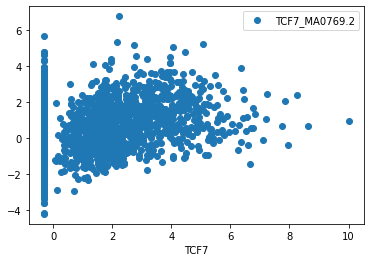

In [127]:
# plotting between two columns: 

dfkk.plot(x='TCF7', y='TCF7_MA0769.2', style='o')



<AxesSubplot:xlabel='TCF7'>

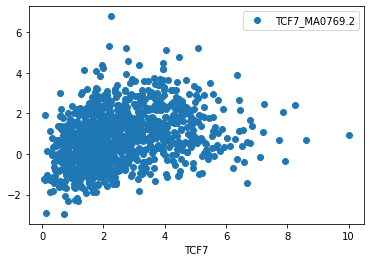

In [134]:
ndf.plot(x='TCF7', y='TCF7_MA0769.2', style='o')



<AxesSubplot:xlabel='MEF2B'>

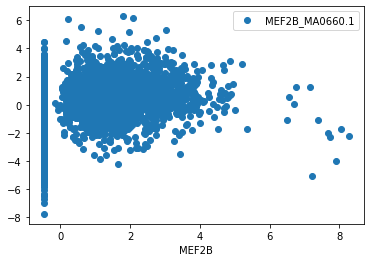

In [131]:
dfkk.plot(x='MEF2B', y='MEF2B_MA0660.1', style='o')

<AxesSubplot:xlabel='LEF1'>

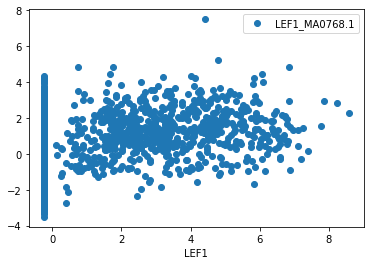

In [128]:
dfkk.plot(x='LEF1', y='LEF1_MA0768.1', style='o')

In [132]:
ndf = dfkk[dfkk['TCF7'] > 0]

In [133]:
ndf['LEF1'].corr(ndf['LEF1_MA0768.1'])

0.3609258859700344

In [135]:
ndf['TCF7'].corr(ndf['TCF7_MA0769.2'])

0.31353299797117323

In [ ]:
# p values: 

In [136]:
from scipy.stats import shapiro

In [137]:
shapiro(dfkk['TCF7'])

/home/mahogny/miniconda3_38/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.3479669690132141, pvalue=0.0)

In [138]:
from scipy import stats

In [139]:
stats.pearsonr(dfkk['TCF7'], dfkk['TCF7_MA0769.2'])

(0.26735762969504623, 8.209498930508047e-164)

In [253]:
stats.spearmanr(dfkk['TCF7'], dfkk['TCF7_MA0769.2'])

SpearmanrResult(correlation=0.21304653206084367, pvalue=2.4079659273111577e-103)

In [81]:
cormat = dfkk.corr()

In [85]:
cormat

,Arnt_MA0004.1,Mecom_MA0029.1,RORA_MA0071.1,RORA(var.2)_MA0072.1,Sox5_MA0087.1,TBP_MA0108.2,HLTF_MA0109.1,REST_MA0138.2,NR4A2_MA0160.1,FOS_MA0476.1,...,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,SREBF1,TCF7,USF2,ZNF263,CREM
Arnt_MA0004.1,1.000000,-0.019294,-0.001774,0.018504,0.001455,0.009103,0.006136,0.028544,0.034184,0.040594,...,0.011809,0.001364,0.027585,0.041966,0.009699,0.020946,0.020893,0.017969,0.003929,0.020235
Mecom_MA0029.1,-0.019294,1.000000,-0.018024,-0.001504,0.035520,0.000061,0.016093,-0.017090,-0.032169,-0.030632,...,0.010284,0.016736,-0.011958,0.006756,-0.030045,-0.006436,0.074700,-0.018187,0.002699,-0.018918
RORA_MA0071.1,-0.001774,-0.018024,1.000000,0.217948,-0.011335,-0.017964,0.000921,0.000473,0.211696,0.073513,...,0.000964,0.009217,-0.029592,0.029166,0.000947,-0.025993,-0.021191,0.007286,0.012481,-0.025858
RORA(var.2)_MA0072.1,0.018504,-0.001504,0.217948,1.000000,-0.006363,0.002827,0.028498,0.010961,0.002758,0.084934,...,-0.010293,0.003850,0.009496,0.070598,0.006600,-0.009001,0.014045,-0.005100,0.003561,-0.005761
Sox5_MA0087.1,0.001455,0.035520,-0.011335,-0.006363,1.000000,0.016224,0.026990,-0.023914,-0.030144,-0.017821,...,0.000790,-0.000367,-0.008721,0.053469,-0.024328,-0.004372,0.084146,-0.012289,-0.005876,-0.028198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SREBF1,0.020946,-0.006436,-0.025993,-0.009001,-0.004372,-0.013682,-0.007461,-0.010403,-0.012545,0.011966,...,-0.001711,0.016820,0.016742,-0.001690,0.014087,1.000000,0.042683,0.003652,0.002196,0.024715
TCF7,0.020893,0.074700,-0.021191,0.014045,0.084146,0.005826,0.011600,0.006571,-0.075558,0.056979,...,-0.005816,0.012878,0.010642,-0.000731,-0.085085,0.042683,1.000000,-0.031588,0.040064,0.025150
USF2,0.017969,-0.018187,0.007286,-0.005100,-0.012289,0.015003,-0.011415,0.002216,-0.001924,-0.004683,...,0.004835,0.034773,0.021701,-0.003859,0.031504,0.003652,-0.031588,1.000000,-0.007709,0.008308
ZNF263,0.003929,0.002699,0.012481,0.003561,-0.005876,-0.011246,0.008163,0.002305,-0.002746,-0.033467,...,0.012366,-0.013350,-0.013522,-0.003764,-0.008241,0.002196,0.040064,-0.007709,1.000000,-0.003889


In [94]:
onefivezerodf = cormat.head(150).transpose().iloc[150:300].transpose()
onefivezerodf

,ARNT,MECOM,RORA,RORA,SOX5,TBP,HLTF,REST,NR4A2,FOS,...,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,SREBF1,TCF7,USF2,ZNF263,CREM
Arnt_MA0004.1,-0.002889,0.024367,0.019711,0.019711,0.020302,0.004580,0.010026,0.022862,-0.000699,0.025238,...,0.011809,0.001364,0.027585,0.041966,0.009699,0.020946,0.020893,0.017969,0.003929,0.020235
Mecom_MA0029.1,0.010146,-0.017442,0.040997,0.040997,-0.086414,0.009032,-0.007052,-0.008135,0.008017,0.037123,...,0.010284,0.016736,-0.011958,0.006756,-0.030045,-0.006436,0.074700,-0.018187,0.002699,-0.018918
RORA_MA0071.1,-0.001878,-0.002048,0.039485,0.039485,-0.011201,-0.004362,0.004174,-0.006714,0.012989,-0.011855,...,0.000964,0.009217,-0.029592,0.029166,0.000947,-0.025993,-0.021191,0.007286,0.012481,-0.025858
RORA(var.2)_MA0072.1,-0.027390,0.011870,0.040631,0.040631,0.048941,-0.017590,0.010908,0.001252,-0.019378,-0.003706,...,-0.010293,0.003850,0.009496,0.070598,0.006600,-0.009001,0.014045,-0.005100,0.003561,-0.005761
Sox5_MA0087.1,0.010943,-0.000972,0.071020,0.071020,-0.126447,-0.006174,-0.012035,-0.006361,0.023345,0.015901,...,0.000790,-0.000367,-0.008721,0.053469,-0.024328,-0.004372,0.084146,-0.012289,-0.005876,-0.028198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SREBF1(var.2)_MA0829.2,0.009985,0.006664,-0.031903,-0.031903,0.029484,0.011626,0.018899,0.005910,0.003273,-0.012745,...,0.015030,0.013669,0.006654,-0.023999,0.020476,-0.014319,-0.068928,-0.009061,-0.013564,0.011405
TCF7_MA0769.2,-0.019108,-0.004832,0.173542,0.173542,-0.132758,-0.016137,-0.046871,0.001203,0.017792,0.055144,...,-0.010437,-0.017499,-0.020723,0.021780,-0.095786,0.004306,0.267358,-0.038422,0.013744,-0.016285
USF2_MA0526.3,0.002447,-0.002792,-0.007266,-0.007266,0.035287,0.003825,-0.001418,0.010661,-0.008881,-0.004663,...,0.000015,0.010836,-0.009177,0.023564,0.023668,-0.010417,-0.042366,0.014231,-0.009816,0.008903
ZNF263_MA0528.2,0.016838,-0.014451,-0.009821,-0.009821,-0.080297,0.000532,-0.021055,-0.002062,-0.000116,0.001852,...,-0.003637,-0.011512,-0.016324,-0.023012,-0.016064,0.001600,-0.004902,0.001641,0.011203,-0.000751


In [95]:
onefivezerodf.round(3)

,ARNT,MECOM,RORA,RORA,SOX5,TBP,HLTF,REST,NR4A2,FOS,...,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,SREBF1,TCF7,USF2,ZNF263,CREM
Arnt_MA0004.1,-0.003,0.024,0.020,0.020,0.020,0.005,0.010,0.023,-0.001,0.025,...,0.012,0.001,0.028,0.042,0.010,0.021,0.021,0.018,0.004,0.020
Mecom_MA0029.1,0.010,-0.017,0.041,0.041,-0.086,0.009,-0.007,-0.008,0.008,0.037,...,0.010,0.017,-0.012,0.007,-0.030,-0.006,0.075,-0.018,0.003,-0.019
RORA_MA0071.1,-0.002,-0.002,0.039,0.039,-0.011,-0.004,0.004,-0.007,0.013,-0.012,...,0.001,0.009,-0.030,0.029,0.001,-0.026,-0.021,0.007,0.012,-0.026
RORA(var.2)_MA0072.1,-0.027,0.012,0.041,0.041,0.049,-0.018,0.011,0.001,-0.019,-0.004,...,-0.010,0.004,0.009,0.071,0.007,-0.009,0.014,-0.005,0.004,-0.006
Sox5_MA0087.1,0.011,-0.001,0.071,0.071,-0.126,-0.006,-0.012,-0.006,0.023,0.016,...,0.001,-0.000,-0.009,0.053,-0.024,-0.004,0.084,-0.012,-0.006,-0.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SREBF1(var.2)_MA0829.2,0.010,0.007,-0.032,-0.032,0.029,0.012,0.019,0.006,0.003,-0.013,...,0.015,0.014,0.007,-0.024,0.020,-0.014,-0.069,-0.009,-0.014,0.011
TCF7_MA0769.2,-0.019,-0.005,0.174,0.174,-0.133,-0.016,-0.047,0.001,0.018,0.055,...,-0.010,-0.017,-0.021,0.022,-0.096,0.004,0.267,-0.038,0.014,-0.016
USF2_MA0526.3,0.002,-0.003,-0.007,-0.007,0.035,0.004,-0.001,0.011,-0.009,-0.005,...,0.000,0.011,-0.009,0.024,0.024,-0.010,-0.042,0.014,-0.010,0.009
ZNF263_MA0528.2,0.017,-0.014,-0.010,-0.010,-0.080,0.001,-0.021,-0.002,-0.000,0.002,...,-0.004,-0.012,-0.016,-0.023,-0.016,0.002,-0.005,0.002,0.011,-0.001


In [98]:
sc.pl.matrixplot(onefivezerodf)

TypeError: matrixplot() missing 2 required positional arguments: 'var_names' and 'groupby'

In [117]:
fourbyfour= onefivezerodf[onefivezerodf.columns[0:3]].head(8)
fourbyfour

,ARNT,MECOM,RORA,RORA
Arnt_MA0004.1,-0.002889,0.024367,0.019711,0.019711
Mecom_MA0029.1,0.010146,-0.017442,0.040997,0.040997
RORA_MA0071.1,-0.001878,-0.002048,0.039485,0.039485
RORA(var.2)_MA0072.1,-0.027390,0.011870,0.040631,0.040631
Sox5_MA0087.1,0.010943,-0.000972,0.071020,0.071020
TBP_MA0108.2,-0.005331,0.006437,-0.007054,-0.007054
HLTF_MA0109.1,-0.006440,0.005998,0.023563,0.023563
REST_MA0138.2,0.018178,0.002082,-0.012276,-0.012276


In [102]:
import seaborn as sns

<AxesSubplot:>

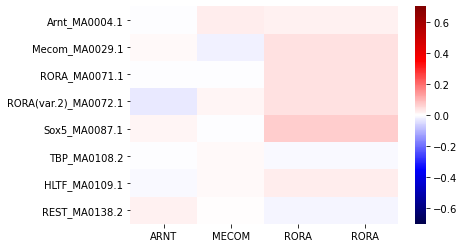

In [120]:
sns.heatmap(fourbyfour, cmap = 'seismic', vmin=-0.7, vmax=0.7)

In [123]:
onefivezerodf

,ARNT,MECOM,RORA,RORA,SOX5,TBP,HLTF,REST,NR4A2,FOS,...,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,SREBF1,TCF7,USF2,ZNF263,CREM
Arnt_MA0004.1,-0.002889,0.024367,0.019711,0.019711,0.020302,0.004580,0.010026,0.022862,-0.000699,0.025238,...,0.011809,0.001364,0.027585,0.041966,0.009699,0.020946,0.020893,0.017969,0.003929,0.020235
Mecom_MA0029.1,0.010146,-0.017442,0.040997,0.040997,-0.086414,0.009032,-0.007052,-0.008135,0.008017,0.037123,...,0.010284,0.016736,-0.011958,0.006756,-0.030045,-0.006436,0.074700,-0.018187,0.002699,-0.018918
RORA_MA0071.1,-0.001878,-0.002048,0.039485,0.039485,-0.011201,-0.004362,0.004174,-0.006714,0.012989,-0.011855,...,0.000964,0.009217,-0.029592,0.029166,0.000947,-0.025993,-0.021191,0.007286,0.012481,-0.025858
RORA(var.2)_MA0072.1,-0.027390,0.011870,0.040631,0.040631,0.048941,-0.017590,0.010908,0.001252,-0.019378,-0.003706,...,-0.010293,0.003850,0.009496,0.070598,0.006600,-0.009001,0.014045,-0.005100,0.003561,-0.005761
Sox5_MA0087.1,0.010943,-0.000972,0.071020,0.071020,-0.126447,-0.006174,-0.012035,-0.006361,0.023345,0.015901,...,0.000790,-0.000367,-0.008721,0.053469,-0.024328,-0.004372,0.084146,-0.012289,-0.005876,-0.028198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SREBF1(var.2)_MA0829.2,0.009985,0.006664,-0.031903,-0.031903,0.029484,0.011626,0.018899,0.005910,0.003273,-0.012745,...,0.015030,0.013669,0.006654,-0.023999,0.020476,-0.014319,-0.068928,-0.009061,-0.013564,0.011405
TCF7_MA0769.2,-0.019108,-0.004832,0.173542,0.173542,-0.132758,-0.016137,-0.046871,0.001203,0.017792,0.055144,...,-0.010437,-0.017499,-0.020723,0.021780,-0.095786,0.004306,0.267358,-0.038422,0.013744,-0.016285
USF2_MA0526.3,0.002447,-0.002792,-0.007266,-0.007266,0.035287,0.003825,-0.001418,0.010661,-0.008881,-0.004663,...,0.000015,0.010836,-0.009177,0.023564,0.023668,-0.010417,-0.042366,0.014231,-0.009816,0.008903
ZNF263_MA0528.2,0.016838,-0.014451,-0.009821,-0.009821,-0.080297,0.000532,-0.021055,-0.002062,-0.000116,0.001852,...,-0.003637,-0.011512,-0.016324,-0.023012,-0.016064,0.001600,-0.004902,0.001641,0.011203,-0.000751


In [140]:
#sns.heatmap(onefivezerodf, cmap = 'seismic', vmin=-0.7, vmax=0.7)
collist = list(onefivezerodf.columns)
indxlist = list(onefivezerodf.index)

In [141]:
corgtf = pd.DataFrame(data=onefivezerodf.index, columns= ['TF_id'])
corgtf

,TF_id
0,Arnt_MA0004.1
1,Mecom_MA0029.1
2,RORA_MA0071.1
3,RORA(var.2)_MA0072.1
4,Sox5_MA0087.1
...,...
145,SREBF1(var.2)_MA0829.2
146,TCF7_MA0769.2
147,USF2_MA0526.3
148,ZNF263_MA0528.2


In [143]:
corgtf['Gene_id'] = collist

In [142]:
acorlist = []
n = -1

for g in range(0, 150): 
    n += 1
    acorlist.append(onefivezerodf.iloc[n,n])




In [144]:
corgtf['Correlation'] = acorlist

In [224]:
cors

[-0.00283104081886705,
 -0.016491961254072623,
 0.0394771354447767,
 0.040643380804370965,
 -0.12637593672864236,
 -0.006665240492842606,
 0.0203377978122128,
 0.03402701394305221,
 0.015327617590620709,
 0.012825930531490589,
 0.03730371857001665,
 0.019253520696769957,
 0.08505186735002626,
 0.04131817843490427,
 -0.003989876857641564,
 0.020974330267049077,
 0.08294722605984313,
 -0.014686507789281345,
 0.047696550056591666,
 -0.006224768950936398,
 -0.003293295569366489,
 -0.001532891846736826,
 0.006049704521546747,
 -0.00326656206159256,
 0.021765913034910184,
 0.006882233664991108,
 -0.024538116958981112,
 0.03909545133564569,
 0.003837815183919341,
 -0.04301649794151476,
 -0.0012992543551352518,
 0.009169337980496593,
 0.09766014061710826,
 -0.0017197892956950325,
 0.003653436926237652,
 0.07321604585662671,
 -0.0017704969627680704,
 0.24035760676088297,
 -0.004014206908160212,
 -0.00944297552822342,
 0.027979077890161057,
 -0.026685443617197456,
 0.001624488174308658,
 0.01855

In [225]:
corgtf['p_values'] = pvals

In [226]:
corgtf

,TF_id,Gene_id,Correlation,p_values
0,Arnt_MA0004.1,ARNT,-0.002889,7.768526e-01
1,Mecom_MA0029.1,MECOM,-0.017442,9.870535e-02
2,RORA_MA0071.1,RORA,0.039485,7.695403e-05
3,RORA(var.2)_MA0072.1,RORA,0.040631,4.689427e-05
4,Sox5_MA0087.1,SOX5,-0.126447,5.708033e-37
...,...,...,...,...
145,SREBF1(var.2)_MA0829.2,SREBF1,-0.014319,1.767916e-01
146,TCF7_MA0769.2,TCF7,0.267358,7.701294e-164
147,USF2_MA0526.3,USF2,0.014231,1.517573e-01
148,ZNF263_MA0528.2,ZNF263,0.011203,2.686236e-01


In [156]:
g = 'ARNT'
stats.pearsonr(dfkk[g], dfkk['Arnt_MA0004.1'])

(-0.002888834604500483, 0.7723222013632677)

In [150]:
stats.pearsonr(dfkk['ARNT'], dfkk['Arnt_MA0004.1'])

(-0.002888834604500483, 0.7723222013632677)

In [261]:
stats.kstest(nodup.dropna()['TCF7'], nodup.dropna()['TCF7_MA0769.2'] )

KstestResult(statistic=0.5013466334164588, pvalue=0.0)

In [262]:
#stats.pearsonr(dfkk['ARNT'], dfkk['Gmeb1_MA0615.1'])
stats.shapiro(nodup.dropna()['TCF7'])

/home/mahogny/miniconda3_38/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.348167359828949, pvalue=0.0)

In [222]:
#dfkk

In [ ]:
dfkk

In [209]:
cdk = dfkk.copy()

In [212]:
cdk

,Arnt_MA0004.1,Mecom_MA0029.1,RORA_MA0071.1,RORA(var.2)_MA0072.1,Sox5_MA0087.1,TBP_MA0108.2,HLTF_MA0109.1,REST_MA0138.2,NR4A2_MA0160.1,FOS_MA0476.1,...,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,SREBF1,TCF7,USF2,ZNF263,CREM
AAACAGCCAAGATTCT-3,1.839727,0.623760,0.156460,-0.053951,2.273084,1.174040,0.959575,0.393913,-0.676809,0.671067,...,-0.17498,-0.233302,-0.317978,3.926708,-0.427881,-0.202377,-0.305595,0.301027,-0.273847,-0.421561
AAACAGCCAATATACC-3,1.271281,-0.377563,-0.880823,0.684899,0.697659,-0.085681,0.826054,1.109191,-1.417485,-1.097127,...,-0.17498,-0.233302,-0.317978,3.458674,-0.427881,-0.202377,1.959104,-0.402540,-0.273847,-0.421561
AAACAGCCAGTACCGT-3,-1.060049,0.240448,0.383065,-0.612445,0.864685,-0.109833,-0.178701,0.847709,-0.210276,-1.136158,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,1.607386,-0.402540,-0.273847,1.760944
AAACAGCCATTGTGGC-1,0.138258,0.093980,-0.091144,1.152515,-1.291754,0.818569,1.648050,1.548902,-2.202974,1.928294,...,-0.17498,-0.233302,-0.317978,7.280515,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
AAACATGCAACGTGCT-4,-0.034799,0.271541,0.942619,1.592229,0.116713,0.979894,0.981385,-0.694102,0.611383,0.852917,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.350634,-0.740192,-0.512458,0.196942,1.265794,0.532152,-0.575883,-0.818690,-0.084230,1.540476,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
TTTGTGTTCGCTAGAT-4,-0.981712,-1.354767,0.290459,2.120435,0.637450,-1.737124,-1.436870,0.866956,0.413982,-1.156834,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,2.408789
TTTGTTGGTAACCTAG-3,1.428377,0.493082,0.649422,1.372901,0.314692,0.670715,0.237397,0.760203,-1.117080,4.324902,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,1.467120,-0.402540,-0.273847,1.600916
TTTGTTGGTCGCAATA-3,-1.455687,0.512055,-2.157537,-0.865838,-0.440568,1.408713,-0.585969,0.408719,0.432047,0.080642,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,2.726240,-0.421561


In [213]:
cdk.dropna()

,Arnt_MA0004.1,Mecom_MA0029.1,RORA_MA0071.1,RORA(var.2)_MA0072.1,Sox5_MA0087.1,TBP_MA0108.2,HLTF_MA0109.1,REST_MA0138.2,NR4A2_MA0160.1,FOS_MA0476.1,...,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,SREBF1,TCF7,USF2,ZNF263,CREM
AAACAGCCAAGATTCT-3,1.839727,0.623760,0.156460,-0.053951,2.273084,1.174040,0.959575,0.393913,-0.676809,0.671067,...,-0.17498,-0.233302,-0.317978,3.926708,-0.427881,-0.202377,-0.305595,0.301027,-0.273847,-0.421561
AAACAGCCAATATACC-3,1.271281,-0.377563,-0.880823,0.684899,0.697659,-0.085681,0.826054,1.109191,-1.417485,-1.097127,...,-0.17498,-0.233302,-0.317978,3.458674,-0.427881,-0.202377,1.959104,-0.402540,-0.273847,-0.421561
AAACAGCCAGTACCGT-3,-1.060049,0.240448,0.383065,-0.612445,0.864685,-0.109833,-0.178701,0.847709,-0.210276,-1.136158,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,1.607386,-0.402540,-0.273847,1.760944
AAACAGCCATTGTGGC-1,0.138258,0.093980,-0.091144,1.152515,-1.291754,0.818569,1.648050,1.548902,-2.202974,1.928294,...,-0.17498,-0.233302,-0.317978,7.280515,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
AAACATGCAACGTGCT-4,-0.034799,0.271541,0.942619,1.592229,0.116713,0.979894,0.981385,-0.694102,0.611383,0.852917,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.350634,-0.740192,-0.512458,0.196942,1.265794,0.532152,-0.575883,-0.818690,-0.084230,1.540476,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,-0.421561
TTTGTGTTCGCTAGAT-4,-0.981712,-1.354767,0.290459,2.120435,0.637450,-1.737124,-1.436870,0.866956,0.413982,-1.156834,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,-0.273847,2.408789
TTTGTTGGTAACCTAG-3,1.428377,0.493082,0.649422,1.372901,0.314692,0.670715,0.237397,0.760203,-1.117080,4.324902,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,1.467120,-0.402540,-0.273847,1.600916
TTTGTTGGTCGCAATA-3,-1.455687,0.512055,-2.157537,-0.865838,-0.440568,1.408713,-0.585969,0.408719,0.432047,0.080642,...,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.202377,-0.305595,-0.402540,2.726240,-0.421561


In [214]:
# pearson corr: 
cors = []
pvals = []
nonan = nodup.dropna()
m=-1
#m=26

for g in range(0, 150):
    m += 1
    tf = corgtf['TF_id'][m]
    gn = corgtf['Gene_id'][m]
    
    inp = nonan[tf]
    inptwo = nonan[gn]
    both = stats.pearsonr(inp, inptwo)
    cors.append(both[0])
    pvals.append(both[1])
    

In [254]:
# spearman corr: 
spearcors = []
spearpvals = []
nonan = nodup.dropna()
m=-1
#m=26

for g in range(0, 150):
    m += 1
    tf = corgtf['TF_id'][m]
    gn = corgtf['Gene_id'][m]
    
    inp = nonan[tf]
    inptwo = nonan[gn]
    both = stats.spearmanr(inp, inptwo)
    spearcors.append(both[0])
    spearpvals.append(both[1])
    

In [217]:
len(cors)

150

In [361]:
#cors

In [219]:
len(pvals)

150

In [207]:
sum(inp)

nan

In [208]:
len(cors)

4

In [203]:
len(cors)

26

In [227]:
#inptwo

In [196]:
sum(inp)

nan

In [201]:
sum(dfkk['Gmeb1_MA0615.1'])

nan

In [269]:
nonan

,Arnt_MA0004.1,Mecom_MA0029.1,RORA_MA0071.1,RORA(var.2)_MA0072.1,Sox5_MA0087.1,TBP_MA0108.2,HLTF_MA0109.1,REST_MA0138.2,NR4A2_MA0160.1,FOS_MA0476.1,...,NFYB,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,TCF7,USF2,ZNF263,CREM
AAACAGCCAAGATTCT-3,1.839727,0.623760,0.156460,-0.053951,2.273084,1.174040,0.959575,0.393913,-0.676809,0.671067,...,-0.239918,-0.17498,-0.233302,-0.317978,3.926708,-0.427881,-0.305595,0.301027,-0.273847,-0.421561
AAACAGCCAATATACC-3,1.271281,-0.377563,-0.880823,0.684899,0.697659,-0.085681,0.826054,1.109191,-1.417485,-1.097127,...,-0.239918,-0.17498,-0.233302,-0.317978,3.458674,-0.427881,1.959104,-0.402540,-0.273847,-0.421561
AAACAGCCAGTACCGT-3,-1.060049,0.240448,0.383065,-0.612445,0.864685,-0.109833,-0.178701,0.847709,-0.210276,-1.136158,...,3.808977,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,1.607386,-0.402540,-0.273847,1.760944
AAACAGCCATTGTGGC-1,0.138258,0.093980,-0.091144,1.152515,-1.291754,0.818569,1.648050,1.548902,-2.202974,1.928294,...,-0.239918,-0.17498,-0.233302,-0.317978,7.280515,-0.427881,-0.305595,-0.402540,-0.273847,-0.421561
AAACATGCAACGTGCT-4,-0.034799,0.271541,0.942619,1.592229,0.116713,0.979894,0.981385,-0.694102,0.611383,0.852917,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.402540,-0.273847,-0.421561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.350634,-0.740192,-0.512458,0.196942,1.265794,0.532152,-0.575883,-0.818690,-0.084230,1.540476,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.402540,-0.273847,-0.421561
TTTGTGTTCGCTAGAT-4,-0.981712,-1.354767,0.290459,2.120435,0.637450,-1.737124,-1.436870,0.866956,0.413982,-1.156834,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.402540,-0.273847,2.408789
TTTGTTGGTAACCTAG-3,1.428377,0.493082,0.649422,1.372901,0.314692,0.670715,0.237397,0.760203,-1.117080,4.324902,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,1.467120,-0.402540,-0.273847,1.600916
TTTGTTGGTCGCAATA-3,-1.455687,0.512055,-2.157537,-0.865838,-0.440568,1.408713,-0.585969,0.408719,0.432047,0.080642,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.402540,2.726240,-0.421561


In [265]:
nonan[nonan['PRDM1'] == nonan['PRDM1'].min()]

,Arnt_MA0004.1,Mecom_MA0029.1,RORA_MA0071.1,RORA(var.2)_MA0072.1,Sox5_MA0087.1,TBP_MA0108.2,HLTF_MA0109.1,REST_MA0138.2,NR4A2_MA0160.1,FOS_MA0476.1,...,NFYB,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,TCF7,USF2,ZNF263,CREM
AAACAGCCAGTACCGT-3,-1.060049,0.240448,0.383065,-0.612445,0.864685,-0.109833,-0.178701,0.847709,-0.210276,-1.136158,...,3.808977,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,1.607386,-0.40254,-0.273847,1.760944
AAACATGCAACGTGCT-4,-0.034799,0.271541,0.942619,1.592229,0.116713,0.979894,0.981385,-0.694102,0.611383,0.852917,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.40254,-0.273847,-0.421561
AAACATGCAATGAAGC-1,1.750616,1.111676,-0.144917,-0.988743,-1.339217,-1.328206,-1.524173,-0.856204,0.141255,1.446708,...,-0.239918,-0.17498,3.199842,-0.317978,-0.209068,-0.427881,-0.305595,-0.40254,-0.273847,1.390122
AAACATGCACAGCCAT-4,3.364953,1.180730,-2.340366,0.001524,0.419618,1.152404,0.823411,-0.811582,0.166049,-1.735384,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,2.115823,-0.40254,-0.273847,-0.421561
AAACATGCACCTGCCT-4,-1.073293,1.168110,0.788801,1.877428,-0.706230,1.219570,-0.974758,-0.267271,-1.639305,1.048553,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,6.580581,-0.40254,4.678129,-0.421561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCCTCACTA-4,0.421155,-0.290081,0.336940,0.233412,0.172242,-2.218570,-1.216866,0.842912,-1.428457,-1.517081,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,1.103641,-0.305595,-0.40254,-0.273847,1.027050
TTTGTGTTCGCTAAAC-1,-0.350634,-0.740192,-0.512458,0.196942,1.265794,0.532152,-0.575883,-0.818690,-0.084230,1.540476,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.40254,-0.273847,-0.421561
TTTGTGTTCGCTAGAT-4,-0.981712,-1.354767,0.290459,2.120435,0.637450,-1.737124,-1.436870,0.866956,0.413982,-1.156834,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.40254,-0.273847,2.408789
TTTGTTGGTAACCTAG-3,1.428377,0.493082,0.649422,1.372901,0.314692,0.670715,0.237397,0.760203,-1.117080,4.324902,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,1.467120,-0.40254,-0.273847,1.600916


In [268]:
nonan[nonan['PRDM1'] == nonan['PRDM1'].min()].shape[0]

9498

In [272]:
9498/ rws

0.947431421446384

In [270]:
# showing that data is not normally distributed: 
normno = []

m=-1
#m=26

rws= 10025

for g in range(0, 150):
    m += 1
    #tf = corgtf['TF_id'][m]
    gn = corgtf['Gene_id'][m]
    
    fff = nonan[nonan[gn] == nonan[gn].min()].shape[0] / rws
    normno.append(fff)

    
    

In [273]:
len(normno)

150

In [298]:
import matplotlib.pyplot as plt

In [264]:
#nonan['PRDM1'].min()

-0.20906809

In [275]:
corgtf['Zero_mRNA_expression'] = normno

In [277]:
#inp
corgtf[corgtf['Zero_mRNA_expression'] > 0.7]

,TF_id,Gene_id,Correlation,p_values,Spearman_cor,Spearman_p_value,Zero_mRNA_expression
0,Arnt_MA0004.1,ARNT,-0.002889,7.768526e-01,0.000654,9.477712e-01,0.819451
1,Mecom_MA0029.1,MECOM,-0.017442,9.870535e-02,-0.015131,1.297934e-01,0.988429
2,RORA_MA0071.1,RORA,0.039485,7.695403e-05,0.021782,2.919071e-02,0.883890
3,RORA(var.2)_MA0072.1,RORA,0.040631,4.689427e-05,0.026995,6.871863e-03,0.883890
4,Sox5_MA0087.1,SOX5,-0.126447,5.708033e-37,-0.127085,2.271381e-37,0.750723
...,...,...,...,...,...,...,...
145,SREBF1(var.2)_MA0829.2,SREBF1,-0.014319,1.767916e-01,-0.010928,2.739408e-01,0.952319
146,TCF7_MA0769.2,TCF7,0.267358,7.701294e-164,0.213175,2.223624e-103,0.892269
147,USF2_MA0526.3,USF2,0.014231,1.517573e-01,0.024271,1.509083e-02,0.832120
148,ZNF263_MA0528.2,ZNF263,0.011203,2.686236e-01,0.010771,2.808994e-01,0.915711


<AxesSubplot:xlabel='Spearman_cor'>

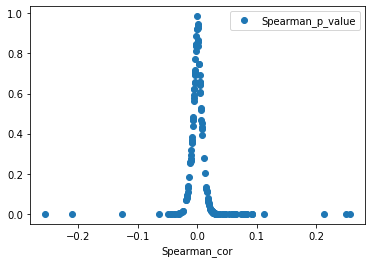

In [279]:
#gn
corgtf.plot(x = 'Spearman_cor', y = 'Spearman_p_value', style = 'o')

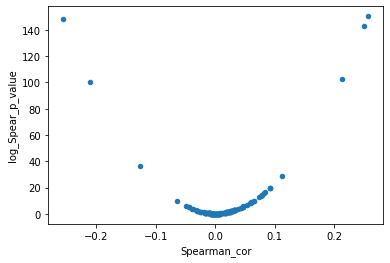

In [301]:
corgtf.plot(x = 'Spearman_cor', y = 'log_Spear_p_value', kind= 'scatter' #style = 'o'
           )
plt.show()

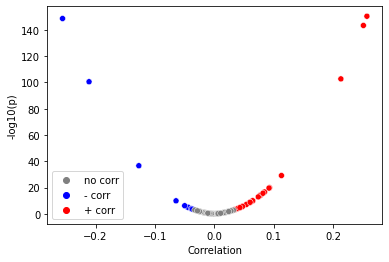

In [329]:
seaplot = sns.scatterplot(data= corgtf, x = 'Spearman_cor', y ='log_Spear_p_value', hue=catlist, palette= ['grey', 'blue', 'red'], 
                )

seaplot.set_xlabel('Correlation')
seaplot.set_ylabel('-log10(p)')
#plt.savefig('spearfig.png')

In [306]:
corgtf['log_Spear_p_value']

0        0.023296
1        0.886747
2        1.534755
3        2.162926
4       36.643710
          ...    
145      0.562343
146    102.652939
147      1.821287
148      0.551449
149     15.705642
Name: log_Spear_p_value, Length: 150, dtype: float64

In [315]:
catlist = []

d= -1 

for g in range(0, 150): 
    d +=1    
    if (corgtf['Spearman_p_value'][d] < 0.001) & (corgtf['Spearman_cor'][d] > 0): 
        catlist.append('+ corr')
    elif (corgtf['Spearman_p_value'][d] < 0.001) & (corgtf['Spearman_cor'][d] < 0): 
        catlist.append('- corr')
    else: 
        catlist.append('no corr')


In [316]:
catlist

['no corr',
 'no corr',
 'no corr',
 'no corr',
 '- corr',
 'no corr',
 'no corr',
 '+ corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 '+ corr',
 'no corr',
 'no corr',
 'no corr',
 '+ corr',
 'no corr',
 '+ corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 '+ corr',
 'no corr',
 '- corr',
 'no corr',
 'no corr',
 '+ corr',
 'no corr',
 'no corr',
 '+ corr',
 'no corr',
 '+ corr',
 'no corr',
 'no corr',
 '+ corr',
 'no corr',
 'no corr',
 'no corr',
 '+ corr',
 'no corr',
 'no corr',
 'no corr',
 '- corr',
 'no corr',
 '+ corr',
 'no corr',
 '+ corr',
 '- corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 '+ corr',
 'no corr',
 'no corr',
 'no corr',
 '+ corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 '+ corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 'no corr',
 '+ corr',
 'no corr',
 'no corr',


In [314]:
corgtf['Spearman_p_value'][1]

0.1297934266587676

In [313]:
corgtf

,TF_id,Gene_id,Correlation,p_values,Spearman_cor,Spearman_p_value,Zero_mRNA_expression,log_Spear_p_value
0,Arnt_MA0004.1,ARNT,-0.002889,7.768526e-01,0.000654,9.477712e-01,0.819451,0.023296
1,Mecom_MA0029.1,MECOM,-0.017442,9.870535e-02,-0.015131,1.297934e-01,0.988429,0.886747
2,RORA_MA0071.1,RORA,0.039485,7.695403e-05,0.021782,2.919071e-02,0.883890,1.534755
3,RORA(var.2)_MA0072.1,RORA,0.040631,4.689427e-05,0.026995,6.871863e-03,0.883890,2.162926
4,Sox5_MA0087.1,SOX5,-0.126447,5.708033e-37,-0.127085,2.271381e-37,0.750723,36.643710
...,...,...,...,...,...,...,...,...
145,SREBF1(var.2)_MA0829.2,SREBF1,-0.014319,1.767916e-01,-0.010928,2.739408e-01,0.952319,0.562343
146,TCF7_MA0769.2,TCF7,0.267358,7.701294e-164,0.213175,2.223624e-103,0.892269,102.652939
147,USF2_MA0526.3,USF2,0.014231,1.517573e-01,0.024271,1.509083e-02,0.832120,1.821287
148,ZNF263_MA0528.2,ZNF263,0.011203,2.686236e-01,0.010771,2.808994e-01,0.915711,0.551449


In [283]:
#inp
np.log10(0.01)

-2.0

In [295]:
corgtf['log_Spear_p_value'] = -np.log10(corgtf['Spearman_p_value'])

In [287]:
corgtf['log_p_value']

0       9.477712e-01
1       1.297934e-01
2       2.919071e-02
3       6.871863e-03
4       2.271381e-37
           ...      
145     2.739408e-01
146    2.223624e-103
147     1.509083e-02
148     2.808994e-01
149     1.969508e-16
Name: Spearman_p_value, Length: 150, dtype: float64

In [359]:
#inptwo
#from bioinfokit import analys, visuz

In [360]:
#corgtf

In [358]:
#visuz.GeneExpression.volcano(df=corgtf, lfc='Spearman_cor', pv='Spearman_p_value')

In [ ]:
#corgtf['Gene_id'][0]

In [233]:
#dfkk

In [234]:
#corgtf['Gene_id'][2]

In [192]:
#dfkk['ARNT'].iloc[:, 0]

In [235]:
#dfkk.shape[1]

In [221]:
#nodup['GME']

In [193]:
nodup = dfkk.T.drop_duplicates().T
nodup

,Arnt_MA0004.1,Mecom_MA0029.1,RORA_MA0071.1,RORA(var.2)_MA0072.1,Sox5_MA0087.1,TBP_MA0108.2,HLTF_MA0109.1,REST_MA0138.2,NR4A2_MA0160.1,FOS_MA0476.1,...,NFYB,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,TCF7,USF2,ZNF263,CREM
AAACAGCCAAGATTCT-3,1.839727,0.623760,0.156460,-0.053951,2.273084,1.174040,0.959575,0.393913,-0.676809,0.671067,...,-0.239918,-0.17498,-0.233302,-0.317978,3.926708,-0.427881,-0.305595,0.301027,-0.273847,-0.421561
AAACAGCCAATATACC-3,1.271281,-0.377563,-0.880823,0.684899,0.697659,-0.085681,0.826054,1.109191,-1.417485,-1.097127,...,-0.239918,-0.17498,-0.233302,-0.317978,3.458674,-0.427881,1.959104,-0.402540,-0.273847,-0.421561
AAACAGCCAGTACCGT-3,-1.060049,0.240448,0.383065,-0.612445,0.864685,-0.109833,-0.178701,0.847709,-0.210276,-1.136158,...,3.808977,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,1.607386,-0.402540,-0.273847,1.760944
AAACAGCCATTGTGGC-1,0.138258,0.093980,-0.091144,1.152515,-1.291754,0.818569,1.648050,1.548902,-2.202974,1.928294,...,-0.239918,-0.17498,-0.233302,-0.317978,7.280515,-0.427881,-0.305595,-0.402540,-0.273847,-0.421561
AAACATGCAACGTGCT-4,-0.034799,0.271541,0.942619,1.592229,0.116713,0.979894,0.981385,-0.694102,0.611383,0.852917,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.402540,-0.273847,-0.421561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.350634,-0.740192,-0.512458,0.196942,1.265794,0.532152,-0.575883,-0.818690,-0.084230,1.540476,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.402540,-0.273847,-0.421561
TTTGTGTTCGCTAGAT-4,-0.981712,-1.354767,0.290459,2.120435,0.637450,-1.737124,-1.436870,0.866956,0.413982,-1.156834,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.402540,-0.273847,2.408789
TTTGTTGGTAACCTAG-3,1.428377,0.493082,0.649422,1.372901,0.314692,0.670715,0.237397,0.760203,-1.117080,4.324902,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,1.467120,-0.402540,-0.273847,1.600916
TTTGTTGGTCGCAATA-3,-1.455687,0.512055,-2.157537,-0.865838,-0.440568,1.408713,-0.585969,0.408719,0.432047,0.080642,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.402540,2.726240,-0.421561


In [184]:
nodup['RORA']

AAACAGCCAAGATTCT-3   -0.310957
AAACAGCCAATATACC-3   -0.310957
AAACAGCCAGTACCGT-3    1.721108
AAACAGCCATTGTGGC-1   -0.310957
AAACATGCAACGTGCT-4   -0.310957
                        ...   
TTTGTGTTCGCTAAAC-1   -0.310957
TTTGTGTTCGCTAGAT-4   -0.310957
TTTGTTGGTAACCTAG-3    6.664606
TTTGTTGGTCGCAATA-3   -0.310957
TTTGTTGGTTGGATAT-4    4.304552
Name: RORA, Length: 10034, dtype: float32

In [ ]:
# dataframe of p values and correlation: 

In [255]:
#corgtf['Spearman_cor'] = spearcors
#spearcors 
#spearpvals 
#corgtf['Spearman_p_value'] = spearpvals

In [357]:
#corgtf[corgtf['Spearman_p_value'] < 0.001]

In [356]:
#corgtf

In [355]:
#corgtf[(corgtf['p_values'] < 0.01)]

In [241]:
corgtf[(corgtf['p_values'] < 0.001) & (corgtf['Correlation'] < 0)]

,TF_id,Gene_id,Correlation,p_values
4,Sox5_MA0087.1,SOX5,-0.126447,5.708033e-37
29,BHLHE41_MA0636.1,BHLHE41,-0.043059,1.643799e-05
48,CUX1_MA0754.1,CUX1,-0.053948,6.489426e-08
53,MYBL1_MA0776.1,MYBL1,-0.035483,3.760812e-04
86,BACH2_MA1101.2,BACH2,-0.258697,2.060188e-153
87,BACH2(var.2)_MA1470.1,BACH2,-0.051886,1.800427e-07
116,BCL6_MA0463.2,BCL6,-0.198724,9.485328e-90
129,ZNF652_MA1657.1,ZNF652,-0.038214,1.182402e-04


In [242]:
corgtf[(corgtf['p_values'] < 0.001) & (corgtf['Correlation'] > 0)]

,TF_id,Gene_id,Correlation,p_values
2,RORA_MA0071.1,RORA,0.039485,7.695403e-05
3,RORA(var.2)_MA0072.1,RORA,0.040631,4.689427e-05
7,REST_MA0138.2,REST,0.033996,6.555755e-04
10,JUN_MA0488.1,JUN,0.037779,1.870700e-04
12,Stat4_MA0518.1,STAT4,0.085050,1.460836e-17
13,TCF7L2_MA0523.1,TCF7L2,0.041283,3.499945e-05
16,IRF1_MA0050.2,IRF1,0.083297,8.916921e-17
18,STAT1_MA0137.3,STAT1,0.047819,1.772791e-06
27,LIN54_MA0619.1,LIN54,0.039033,9.024034e-05
32,ETV6_MA0645.1,ETV6,0.097745,1.121095e-22


In [354]:
# two lists: cors and pvals
#cors

In [243]:
0.05/150

0.0003333333333333334

In [244]:
# strict bonferroni
corgtf[(corgtf['p_values'] < 0.05/150) & (corgtf['Correlation'] < 0)]

,TF_id,Gene_id,Correlation,p_values
4,Sox5_MA0087.1,SOX5,-0.126447,5.708033e-37
29,BHLHE41_MA0636.1,BHLHE41,-0.043059,1.643799e-05
48,CUX1_MA0754.1,CUX1,-0.053948,6.489426e-08
86,BACH2_MA1101.2,BACH2,-0.258697,2.060188e-153
87,BACH2(var.2)_MA1470.1,BACH2,-0.051886,1.800427e-07
116,BCL6_MA0463.2,BCL6,-0.198724,9.485328e-90
129,ZNF652_MA1657.1,ZNF652,-0.038214,1.182402e-04


In [245]:
corgtf[(corgtf['p_values'] < 0.05/150) & (corgtf['Correlation'] > 0)]

,TF_id,Gene_id,Correlation,p_values
2,RORA_MA0071.1,RORA,0.039485,7.695403e-05
3,RORA(var.2)_MA0072.1,RORA,0.040631,4.689427e-05
10,JUN_MA0488.1,JUN,0.037779,1.870700e-04
12,Stat4_MA0518.1,STAT4,0.085050,1.460836e-17
13,TCF7L2_MA0523.1,TCF7L2,0.041283,3.499945e-05
16,IRF1_MA0050.2,IRF1,0.083297,8.916921e-17
18,STAT1_MA0137.3,STAT1,0.047819,1.772791e-06
27,LIN54_MA0619.1,LIN54,0.039033,9.024034e-05
32,ETV6_MA0645.1,ETV6,0.097745,1.121095e-22
35,IRF9_MA0653.1,IRF9,0.073190,2.140915e-13


In [124]:
#onefivezerodf.to_csv('/corgi/filippe/FromHome/corranalysis/df150hvgenesandtf.csv')

In [438]:
#cvar['zcvar'].var[cvar['zcvar'].var['Gene'] != 'Nogenes']

In [ ]:
#data = [tfdf.var["gene_ids"], tfdf.var["TF only"], tfdf.var["allTFgenes"]]
#headers = ["TF_ids", "TF only", "allTFgenes"]
#dftt = pd.concat(data, axis=1, keys=headers)

In [86]:
list(evrygene['gene_ids'])

Arnt_MA0004.1                  Arnt_MA0004.1
Mecom_MA0029.1                Mecom_MA0029.1
FOXD1_MA0031.1                FOXD1_MA0031.1
IRF2_MA0051.1                  IRF2_MA0051.1
MZF1(var.2)_MA0057.1    MZF1(var.2)_MA0057.1
                                ...         
USF1_MA0093.3                  USF1_MA0093.3
USF2_MA0526.3                  USF2_MA0526.3
YY2_MA0748.2                    YY2_MA0748.2
ZNF263_MA0528.2              ZNF263_MA0528.2
CREM_MA0609.2                  CREM_MA0609.2
Name: gene_ids, Length: 502, dtype: object

In [68]:
evrygene = cvar['zcvar'].var[cvar['zcvar'].var['Gene'] != 'Nogenes']

In [69]:
evrygene

,gene_ids,TF_only,Gene,is_hvg
Arnt_MA0004.1,Arnt_MA0004.1,Arnt,ARNT,1
Mecom_MA0029.1,Mecom_MA0029.1,Mecom,MECOM,1
FOXD1_MA0031.1,FOXD1_MA0031.1,FOXD1,FOXD1,0
IRF2_MA0051.1,IRF2_MA0051.1,IRF2,IRF2,0
MZF1(var.2)_MA0057.1,MZF1(var.2)_MA0057.1,MZF1(var.2),MZF1,0
...,...,...,...,...
USF1_MA0093.3,USF1_MA0093.3,USF1,USF1,0
USF2_MA0526.3,USF2_MA0526.3,USF2,USF2,1
YY2_MA0748.2,YY2_MA0748.2,YY2,YY2,0
ZNF263_MA0528.2,ZNF263_MA0528.2,ZNF263,ZNF263,1


In [330]:
hvmrna

,LINC01128,ISG15,C1orf159,SDF4,ACAP3,AURKAIP1,CCNL2,MRPL20,ATAD3B,SSU72,...,CMC4,VBP1,RAB39B,TMLHE-AS1,TMLHE,VAMP7,ZFY,MT-ND4L,MT-ND6,AL592183.1
AAACAGCCAAGATTCT-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,1.074615,-0.381410,0.193030,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,0.192612,-0.263229,-0.079372,-0.414940,-0.082820,-0.350879
AAACAGCCAATATACC-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,3.692045,-0.161463,2.529190,...,-0.131234,-0.243108,-0.108068,2.777642,3.542053,-0.263229,-0.079372,1.246675,-0.569847,-0.350879
AAACAGCCAGTACCGT-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,2.439528,-0.381410,1.805466,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,-1.159973,-0.569847,-0.350879
AAACAGCCATTGTGGC-1,-0.165226,-0.232669,-0.231944,-0.267128,1.880199,2.391885,-0.381410,0.843237,-0.161463,1.550718,...,-0.131234,-0.243108,-0.108068,0.496890,0.264151,0.766644,-0.079372,-0.135346,1.160963,-0.350879
AAACATGCAACGTGCT-4,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,-0.423457,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,1.147914,-0.569847,-0.350879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,2.708092,3.819819,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,0.120159,-0.569847,-0.350879
TTTGTGTTCGCTAGAT-4,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,2.881158,-0.423457,-0.161463,2.809488,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,4.043496,-0.079372,1.794645,-0.569847,2.975671
TTTGTTGGTAACCTAG-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,-0.423457,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,-0.193990,-0.569847,-0.350879
TTTGTTGGTCGCAATA-3,-0.165226,-0.232669,-0.231944,-0.267128,-0.136925,-0.352386,-0.381410,1.764577,-0.161463,-0.407982,...,-0.131234,-0.243108,-0.108068,-0.312608,-0.397522,-0.263229,-0.079372,-1.159973,-0.569847,2.167192


In [348]:
nonan[highlyvargenes]

,ARNT,MECOM,RORA,SOX5,TBP,HLTF,REST,NR4A2,FOS,JUN,...,NFYB,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,TCF7,USF2,ZNF263,CREM
AAACAGCCAAGATTCT-3,0.170247,-0.097297,-0.310957,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,0.420121,-0.345981,...,-0.239918,-0.17498,-0.233302,-0.317978,3.926708,-0.427881,-0.305595,0.301027,-0.273847,-0.421561
AAACAGCCAATATACC-3,-0.419758,-0.097297,-0.310957,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,1.075397,-0.664575,...,-0.239918,-0.17498,-0.233302,-0.317978,3.458674,-0.427881,1.959104,-0.402540,-0.273847,-0.421561
AAACAGCCAGTACCGT-3,-0.419758,-0.097297,1.721108,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,0.818591,-0.664575,...,3.808977,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,1.607386,-0.402540,-0.273847,1.760944
AAACAGCCATTGTGGC-1,-0.419758,-0.097297,-0.310957,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,1.627424,1.005871,...,-0.239918,-0.17498,-0.233302,-0.317978,7.280515,-0.427881,-0.305595,-0.402540,-0.273847,-0.421561
AAACATGCAACGTGCT-4,-0.419758,-0.097297,-0.310957,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,-0.578166,1.885670,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.402540,-0.273847,-0.421561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.419758,-0.097297,-0.310957,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,-0.578166,-0.664575,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.402540,-0.273847,-0.421561
TTTGTGTTCGCTAGAT-4,-0.419758,-0.097297,-0.310957,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,-0.578166,0.829229,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.402540,-0.273847,2.408789
TTTGTTGGTAACCTAG-3,-0.419758,-0.097297,6.664606,-0.498452,2.996674,3.721410,-0.440894,-0.331779,1.519831,0.402849,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,1.467120,-0.402540,-0.273847,1.600916
TTTGTTGGTCGCAATA-3,-0.419758,-0.097297,-0.310957,1.596091,-0.268619,-0.335787,-0.440894,-0.331779,-0.578166,-0.664575,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.402540,2.726240,-0.421561


In [349]:
changed = nonan[highlyvargenes].copy()

In [350]:
changed

,ARNT,MECOM,RORA,SOX5,TBP,HLTF,REST,NR4A2,FOS,JUN,...,NFYB,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,TCF7,USF2,ZNF263,CREM
AAACAGCCAAGATTCT-3,0.170247,-0.097297,-0.310957,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,0.420121,-0.345981,...,-0.239918,-0.17498,-0.233302,-0.317978,3.926708,-0.427881,-0.305595,0.301027,-0.273847,-0.421561
AAACAGCCAATATACC-3,-0.419758,-0.097297,-0.310957,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,1.075397,-0.664575,...,-0.239918,-0.17498,-0.233302,-0.317978,3.458674,-0.427881,1.959104,-0.402540,-0.273847,-0.421561
AAACAGCCAGTACCGT-3,-0.419758,-0.097297,1.721108,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,0.818591,-0.664575,...,3.808977,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,1.607386,-0.402540,-0.273847,1.760944
AAACAGCCATTGTGGC-1,-0.419758,-0.097297,-0.310957,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,1.627424,1.005871,...,-0.239918,-0.17498,-0.233302,-0.317978,7.280515,-0.427881,-0.305595,-0.402540,-0.273847,-0.421561
AAACATGCAACGTGCT-4,-0.419758,-0.097297,-0.310957,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,-0.578166,1.885670,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.402540,-0.273847,-0.421561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.419758,-0.097297,-0.310957,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,-0.578166,-0.664575,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.402540,-0.273847,-0.421561
TTTGTGTTCGCTAGAT-4,-0.419758,-0.097297,-0.310957,-0.498452,-0.268619,-0.335787,-0.440894,-0.331779,-0.578166,0.829229,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.402540,-0.273847,2.408789
TTTGTTGGTAACCTAG-3,-0.419758,-0.097297,6.664606,-0.498452,2.996674,3.721410,-0.440894,-0.331779,1.519831,0.402849,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,1.467120,-0.402540,-0.273847,1.600916
TTTGTTGGTCGCAATA-3,-0.419758,-0.097297,-0.310957,1.596091,-0.268619,-0.335787,-0.440894,-0.331779,-0.578166,-0.664575,...,-0.239918,-0.17498,-0.233302,-0.317978,-0.209068,-0.427881,-0.305595,-0.402540,2.726240,-0.421561


In [344]:
#highlyvargenes = list(changed.columns[150:290])

In [336]:
#nonan

In [341]:
# MAGIC package stuff: 
import magic
import pandas as pd
import matplotlib.pyplot as plt




In [351]:
magic_operator = magic.MAGIC()

In [352]:
# main thing
X_magic = magic_operator.fit_transform(changed, genes= highlyvargenes)

Calculating MAGIC...
  Running MAGIC on 10025 cells and 140 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.37 seconds.
    Calculating KNN search...
    Calculated KNN search in 11.89 seconds.
    Calculating affinities...


/home/filippe/.local/lib/python3.8/site-packages/graphtools/graphs.py:287: RuntimeWarning: Detected zero distance between 1894 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated affinities in 11.78 seconds.
  Calculated graph and diffusion operator in 24.06 seconds.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 24.16 seconds.


/home/filippe/.local/lib/python3.8/site-packages/graphtools/base.py:553: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)


In [353]:
X_magic

,ARNT,MECOM,RORA,SOX5,TBP,HLTF,REST,NR4A2,FOS,JUN,...,NFYB,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,TCF7,USF2,ZNF263,CREM
AAACAGCCAAGATTCT-3,-0.131879,-0.012979,0.114243,-0.256341,-0.155485,-0.141585,-0.208747,-0.049063,0.289728,0.413569,...,-0.132961,-0.075530,-0.141547,-0.172463,2.357069,-0.231088,-0.114027,-0.073077,-0.110194,-0.097857
AAACAGCCAATATACC-3,-0.111777,-0.068224,-0.079518,-0.306687,-0.161800,-0.179968,-0.197942,-0.025661,0.062745,0.016075,...,-0.177638,-0.089477,-0.136487,-0.149424,0.024770,-0.220874,0.014738,-0.075881,0.015316,-0.128558
AAACAGCCAGTACCGT-3,-0.136407,-0.023952,0.998186,-0.396646,-0.112750,-0.176918,-0.059442,-0.006718,0.115414,0.210931,...,0.202080,-0.035737,-0.074498,-0.088895,0.107960,-0.365665,1.781915,-0.159003,-0.004637,-0.041263
AAACAGCCATTGTGGC-1,-0.213878,-0.056177,-0.047240,-0.257131,-0.150937,-0.082774,-0.181747,-0.140705,0.430589,0.940239,...,-0.075530,-0.079105,-0.129412,-0.150704,5.314383,-0.266671,-0.253407,-0.039710,-0.041607,0.173235
AAACATGCAACGTGCT-4,-0.106760,-0.076536,-0.111912,-0.020931,-0.149044,-0.137122,-0.069567,0.035260,-0.180367,0.020279,...,-0.146208,-0.064178,-0.090338,-0.191475,-0.058035,-0.076904,-0.145564,-0.047305,-0.149705,-0.108877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.211458,-0.047136,-0.149473,-0.051340,-0.018954,-0.156691,-0.077772,-0.057798,-0.228093,-0.256793,...,-0.096752,-0.098372,-0.155428,-0.160403,-0.162404,-0.188035,-0.214012,-0.034430,-0.150466,-0.197359
TTTGTGTTCGCTAGAT-4,-0.001660,-0.081461,-0.109955,-0.188655,-0.148774,-0.147941,0.029003,-0.078649,-0.109695,0.046715,...,-0.092214,-0.089142,-0.106668,-0.141989,-0.113465,-0.054018,-0.138691,-0.100942,-0.104768,0.152100
TTTGTTGGTAACCTAG-3,-0.067904,0.294454,1.918603,-0.249152,0.177186,0.131686,-0.006453,-0.118676,0.267202,0.286682,...,-0.120594,-0.114131,-0.093715,-0.126850,0.127039,-0.301091,0.730699,-0.170984,-0.055096,-0.020001
TTTGTTGGTCGCAATA-3,-0.123088,-0.066235,-0.104457,-0.134755,-0.085885,-0.154840,-0.138234,-0.135254,-0.151070,-0.126594,...,-0.159010,-0.070590,-0.131077,-0.160903,-0.132779,-0.191196,-0.111094,-0.132280,0.294454,-0.149492


In [ ]:
X_magic

In [363]:
stats.pearsonr(X_magic['TCF7'], nonan['TCF7_MA0769.2'] )

(0.3218377149569146, 2.547813452754921e-240)

In [368]:
tfflist= list(nonan.columns[0:150])

In [ ]:
tfflist

In [377]:
# X_magic.plot(x = 'TCF7', y = nonan['TCF7_MA0769.2'], kind= 'scatter')

In [ ]:
#nonan[highlyvargenes]

In [386]:
#nonan[tfflist] 

In [385]:
#mdf = nonan[tfflist].copy()

In [384]:
#mdf

In [383]:
#mdf[highlyvargenes] = X_magic[highlyvargenes]

In [382]:
#X_magic[highlyvargenes]

In [376]:
mdf

,Arnt_MA0004.1,Mecom_MA0029.1,RORA_MA0071.1,RORA(var.2)_MA0072.1,Sox5_MA0087.1,TBP_MA0108.2,HLTF_MA0109.1,REST_MA0138.2,NR4A2_MA0160.1,FOS_MA0476.1,...,NFYB,NR4A1,PBX2,PKNOX1,PRDM1,SPI1,TCF7,USF2,ZNF263,CREM
AAACAGCCAAGATTCT-3,1.839727,0.623760,0.156460,-0.053951,2.273084,1.174040,0.959575,0.393913,-0.676809,0.671067,...,-0.132961,-0.075530,-0.141547,-0.172463,2.357069,-0.231088,-0.114027,-0.073077,-0.110194,-0.097857
AAACAGCCAATATACC-3,1.271281,-0.377563,-0.880823,0.684899,0.697659,-0.085681,0.826054,1.109191,-1.417485,-1.097127,...,-0.177638,-0.089477,-0.136487,-0.149424,0.024770,-0.220874,0.014738,-0.075881,0.015316,-0.128558
AAACAGCCAGTACCGT-3,-1.060049,0.240448,0.383065,-0.612445,0.864685,-0.109833,-0.178701,0.847709,-0.210276,-1.136158,...,0.202080,-0.035737,-0.074498,-0.088895,0.107960,-0.365665,1.781915,-0.159003,-0.004637,-0.041263
AAACAGCCATTGTGGC-1,0.138258,0.093980,-0.091144,1.152515,-1.291754,0.818569,1.648050,1.548902,-2.202974,1.928294,...,-0.075530,-0.079105,-0.129412,-0.150704,5.314383,-0.266671,-0.253407,-0.039710,-0.041607,0.173235
AAACATGCAACGTGCT-4,-0.034799,0.271541,0.942619,1.592229,0.116713,0.979894,0.981385,-0.694102,0.611383,0.852917,...,-0.146208,-0.064178,-0.090338,-0.191475,-0.058035,-0.076904,-0.145564,-0.047305,-0.149705,-0.108877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,-0.350634,-0.740192,-0.512458,0.196942,1.265794,0.532152,-0.575883,-0.818690,-0.084230,1.540476,...,-0.096752,-0.098372,-0.155428,-0.160403,-0.162404,-0.188035,-0.214012,-0.034430,-0.150466,-0.197359
TTTGTGTTCGCTAGAT-4,-0.981712,-1.354767,0.290459,2.120435,0.637450,-1.737124,-1.436870,0.866956,0.413982,-1.156834,...,-0.092214,-0.089142,-0.106668,-0.141989,-0.113465,-0.054018,-0.138691,-0.100942,-0.104768,0.152100
TTTGTTGGTAACCTAG-3,1.428377,0.493082,0.649422,1.372901,0.314692,0.670715,0.237397,0.760203,-1.117080,4.324902,...,-0.120594,-0.114131,-0.093715,-0.126850,0.127039,-0.301091,0.730699,-0.170984,-0.055096,-0.020001
TTTGTTGGTCGCAATA-3,-1.455687,0.512055,-2.157537,-0.865838,-0.440568,1.408713,-0.585969,0.408719,0.432047,0.080642,...,-0.159010,-0.070590,-0.131077,-0.160903,-0.132779,-0.191196,-0.111094,-0.132280,0.294454,-0.149492


<AxesSubplot:xlabel='TCF7', ylabel='TCF7_MA0769.2'>

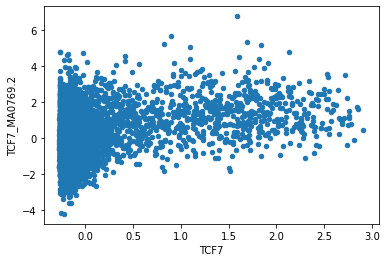

In [378]:
mdf.plot(x = 'TCF7', y = 'TCF7_MA0769.2', kind= 'scatter')

<AxesSubplot:xlabel='TCF7', ylabel='PRDM1'>

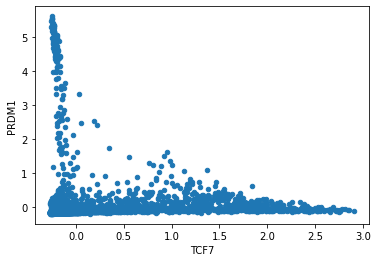

In [379]:
mdf.plot(x = 'TCF7', y = 'PRDM1', kind= 'scatter')

In [380]:
corgtf

,TF_id,Gene_id,Correlation,p_values,Spearman_cor,Spearman_p_value,Zero_mRNA_expression,log_Spear_p_value
0,Arnt_MA0004.1,ARNT,-0.002889,7.768526e-01,0.000654,9.477712e-01,0.819451,0.023296
1,Mecom_MA0029.1,MECOM,-0.017442,9.870535e-02,-0.015131,1.297934e-01,0.988429,0.886747
2,RORA_MA0071.1,RORA,0.039485,7.695403e-05,0.021782,2.919071e-02,0.883890,1.534755
3,RORA(var.2)_MA0072.1,RORA,0.040631,4.689427e-05,0.026995,6.871863e-03,0.883890,2.162926
4,Sox5_MA0087.1,SOX5,-0.126447,5.708033e-37,-0.127085,2.271381e-37,0.750723,36.643710
...,...,...,...,...,...,...,...,...
145,SREBF1(var.2)_MA0829.2,SREBF1,-0.014319,1.767916e-01,-0.010928,2.739408e-01,0.952319,0.562343
146,TCF7_MA0769.2,TCF7,0.267358,7.701294e-164,0.213175,2.223624e-103,0.892269,102.652939
147,USF2_MA0526.3,USF2,0.014231,1.517573e-01,0.024271,1.509083e-02,0.832120,1.821287
148,ZNF263_MA0528.2,ZNF263,0.011203,2.686236e-01,0.010771,2.808994e-01,0.915711,0.551449


<AxesSubplot:xlabel='USF2', ylabel='USF2_MA0526.3'>

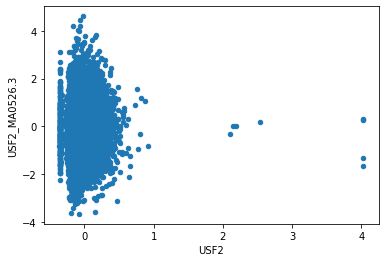

In [381]:
mdf.plot(x = 'USF2', y = 'USF2_MA0526.3', kind= 'scatter')

In [387]:
# imputed pearson corr: 
cors = []
pvals = []
#nonan = nodup.dropna()
m=-1
#m=26

for g in range(0, 150):
    m += 1
    tf = corgtf['TF_id'][m]
    gn = corgtf['Gene_id'][m]
    
    inp = mdf[tf]
    inptwo = mdf[gn]
    both = stats.pearsonr(inp, inptwo)
    cors.append(both[0])
    pvals.append(both[1])
    

In [388]:
# imputed spearman corr: 
spearcors = []
spearpvals = []
#nonan = nodup.dropna()
m=-1
#m=26

for g in range(0, 150):
    m += 1
    tf = corgtf['TF_id'][m]
    gn = corgtf['Gene_id'][m]
    
    inp = mdf[tf]
    inptwo = mdf[gn]
    both = stats.spearmanr(inp, inptwo)
    spearcors.append(both[0])
    spearpvals.append(both[1])
    

In [405]:
#cors

In [391]:
stats.shapiro(inp)

/home/mahogny/miniconda3_38/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9987809658050537, pvalue=6.705128043904551e-07)

In [403]:
#spearcors

In [404]:
#spearpvals

In [398]:
corgtf[['TF_id','Gene_id']]

,TF_id,Gene_id
0,Arnt_MA0004.1,ARNT
1,Mecom_MA0029.1,MECOM
2,RORA_MA0071.1,RORA
3,RORA(var.2)_MA0072.1,RORA
4,Sox5_MA0087.1,SOX5
...,...,...
145,SREBF1(var.2)_MA0829.2,SREBF1
146,TCF7_MA0769.2,TCF7
147,USF2_MA0526.3,USF2
148,ZNF263_MA0528.2,ZNF263


In [399]:
corp = corgtf[['TF_id','Gene_id']].copy()
corp

,TF_id,Gene_id
0,Arnt_MA0004.1,ARNT
1,Mecom_MA0029.1,MECOM
2,RORA_MA0071.1,RORA
3,RORA(var.2)_MA0072.1,RORA
4,Sox5_MA0087.1,SOX5
...,...,...
145,SREBF1(var.2)_MA0829.2,SREBF1
146,TCF7_MA0769.2,TCF7
147,USF2_MA0526.3,USF2
148,ZNF263_MA0528.2,ZNF263


In [400]:
corp['pear_cor'] = cors
corp['pear_pval'] = pvals

In [401]:
corp['spear_cor'] = spearcors
corp['spear_pval'] = spearpvals

In [411]:
# imputed gene expression
corp[corp['pear_cor']> 0.1]

,TF_id,Gene_id,pear_cor,pear_pval,spear_cor,spear_pval
7,REST_MA0138.2,REST,0.104754,7.284168e-26,0.100552,5.989969e-24
12,Stat4_MA0518.1,STAT4,0.154335,1.746686e-54,0.198200,2.396798e-89
13,TCF7L2_MA0523.1,TCF7L2,0.125798,1.204851e-36,0.072099,4.921109e-13
16,IRF1_MA0050.2,IRF1,0.176993,2.398068e-71,0.199642,1.192810e-90
18,STAT1_MA0137.3,STAT1,0.111245,5.607139e-29,0.159291,5.754355e-58
27,LIN54_MA0619.1,LIN54,0.210843,4.032143e-101,0.198754,7.592909e-90
32,ETV6_MA0645.1,ETV6,0.191687,1.379884e-83,0.175797,2.143721e-70
35,IRF9_MA0653.1,IRF9,0.126709,3.706443e-37,0.169683,1.215240e-65
37,MEF2B_MA0660.1,MEF2B,0.371176,0.000000e+00,0.291627,9.719339e-196
50,LEF1_MA0768.1,LEF1,0.327051,1.477462e-248,0.211301,1.460407e-101


In [408]:
corp[corp['pear_cor'] < -0.3]

,TF_id,Gene_id,pear_cor,pear_pval,spear_cor,spear_pval
116,BCL6_MA0463.2,BCL6,-0.313942,3.721532e-228,-0.210397,1.082819e-100


In [423]:
corp[corp['spear_pval'] > 0.001]

,TF_id,Gene_id,pear_cor,pear_pval,spear_cor,spear_pval,neglogp_spear
0,Arnt_MA0004.1,ARNT,0.004326,0.664943,0.005032,0.614445,0.211517
2,RORA_MA0071.1,RORA,0.028276,0.004635,0.024054,0.016018,1.795382
3,RORA(var.2)_MA0072.1,RORA,0.041219,0.000037,-0.016992,0.088890,1.051147
5,TBP_MA0108.2,TBP,-0.005105,0.609292,0.000220,0.982450,0.007690
6,HLTF_MA0109.1,HLTF,0.044247,0.000009,0.030245,0.002457,2.609651
...,...,...,...,...,...,...,...
137,MAFF_MA0495.3,MAFF,0.026123,0.008906,0.003073,0.758378,0.120114
140,NR4A1_MA1112.2,NR4A1,0.000400,0.968059,0.003566,0.721080,0.142017
141,PBX2_MA1113.2,PBX2,-0.001579,0.874398,-0.003999,0.688862,0.161868
143,PRDM1_MA0508.3,PRDM1,-0.001312,0.895469,0.018703,0.061131,1.213737


In [424]:
corp[corp['spear_pval'] < 0.001]

,TF_id,Gene_id,pear_cor,pear_pval,spear_cor,spear_pval,neglogp_spear
1,Mecom_MA0029.1,MECOM,-0.035988,3.133754e-04,-0.041090,3.866458e-05,4.412687
4,Sox5_MA0087.1,SOX5,-0.120346,1.162089e-33,-0.121070,4.753165e-34,33.323017
7,REST_MA0138.2,REST,0.104754,7.284168e-26,0.100552,5.989969e-24,23.222575
8,NR4A2_MA0160.1,NR4A2,0.033088,9.216644e-04,0.038880,9.867207e-05,4.005806
11,JUN(var.2)_MA0489.1,JUN,0.072181,4.632026e-13,0.052461,1.474998e-07,6.831209
...,...,...,...,...,...,...,...
144,SPI1_MA0080.5,SPI1,0.051728,2.194428e-07,0.115548,3.812302e-31,30.418813
146,TCF7_MA0769.2,TCF7,0.321838,2.547813e-240,0.218039,3.546417e-108,107.450210
147,USF2_MA0526.3,USF2,0.024823,1.293610e-02,0.045942,4.187952e-06,5.377998
148,ZNF263_MA0528.2,ZNF263,0.028363,4.511155e-03,0.047892,1.607889e-06,5.793744


In [410]:
corp[corp['pear_cor'] < -0.1][['TF_id', 'Gene_id', 'spear_cor', 'spear_pval']]

,TF_id,Gene_id,pear_cor,pear_pval,spear_cor,spear_pval
4,Sox5_MA0087.1,SOX5,-0.120346,1.162089e-33,-0.121070,4.753165e-34
86,BACH2_MA1101.2,BACH2,-0.184662,1.322335e-77,-0.209970,2.777506e-100
116,BCL6_MA0463.2,BCL6,-0.313942,3.721532e-228,-0.210397,1.082819e-100
134,GABPA_MA0062.3,GABPA,-0.140830,1.415920e-45,-0.164476,9.874868e-62


In [430]:
corp[corp['spear_cor'] < -0.1][['TF_id', 'Gene_id', 'spear_cor', 'spear_pval']]

,TF_id,Gene_id,spear_cor,spear_pval
4,Sox5_MA0087.1,SOX5,-0.121070,4.753165e-34
41,ZBTB18_MA0698.1,ZBTB18,-0.170810,1.667116e-66
86,BACH2_MA1101.2,BACH2,-0.209970,2.777506e-100
116,BCL6_MA0463.2,BCL6,-0.210397,1.082819e-100
134,GABPA_MA0062.3,GABPA,-0.164476,9.874868e-62
138,MXI1_MA1108.2,MXI1,-0.155420,3.084280e-55


In [434]:
corp[corp['spear_pval'] < (0.05/150)]

,TF_id,Gene_id,pear_cor,pear_pval,spear_cor,spear_pval,neglogp_spear
1,Mecom_MA0029.1,MECOM,-0.035988,3.133754e-04,-0.041090,3.866458e-05,4.412687
4,Sox5_MA0087.1,SOX5,-0.120346,1.162089e-33,-0.121070,4.753165e-34,33.323017
7,REST_MA0138.2,REST,0.104754,7.284168e-26,0.100552,5.989969e-24,23.222575
8,NR4A2_MA0160.1,NR4A2,0.033088,9.216644e-04,0.038880,9.867207e-05,4.005806
11,JUN(var.2)_MA0489.1,JUN,0.072181,4.632026e-13,0.052461,1.474998e-07,6.831209
...,...,...,...,...,...,...,...
144,SPI1_MA0080.5,SPI1,0.051728,2.194428e-07,0.115548,3.812302e-31,30.418813
146,TCF7_MA0769.2,TCF7,0.321838,2.547813e-240,0.218039,3.546417e-108,107.450210
147,USF2_MA0526.3,USF2,0.024823,1.293610e-02,0.045942,4.187952e-06,5.377998
148,ZNF263_MA0528.2,ZNF263,0.028363,4.511155e-03,0.047892,1.607889e-06,5.793744


In [435]:
corp[corp['spear_pval'] < (0.001)]

,TF_id,Gene_id,pear_cor,pear_pval,spear_cor,spear_pval,neglogp_spear
1,Mecom_MA0029.1,MECOM,-0.035988,3.133754e-04,-0.041090,3.866458e-05,4.412687
4,Sox5_MA0087.1,SOX5,-0.120346,1.162089e-33,-0.121070,4.753165e-34,33.323017
7,REST_MA0138.2,REST,0.104754,7.284168e-26,0.100552,5.989969e-24,23.222575
8,NR4A2_MA0160.1,NR4A2,0.033088,9.216644e-04,0.038880,9.867207e-05,4.005806
11,JUN(var.2)_MA0489.1,JUN,0.072181,4.632026e-13,0.052461,1.474998e-07,6.831209
...,...,...,...,...,...,...,...
144,SPI1_MA0080.5,SPI1,0.051728,2.194428e-07,0.115548,3.812302e-31,30.418813
146,TCF7_MA0769.2,TCF7,0.321838,2.547813e-240,0.218039,3.546417e-108,107.450210
147,USF2_MA0526.3,USF2,0.024823,1.293610e-02,0.045942,4.187952e-06,5.377998
148,ZNF263_MA0528.2,ZNF263,0.028363,4.511155e-03,0.047892,1.607889e-06,5.793744


In [432]:
corp[(corp['spear_cor'] > 0.1) | (corp['spear_cor'] < -0.1)]

,TF_id,Gene_id,pear_cor,pear_pval,spear_cor,spear_pval,neglogp_spear
4,Sox5_MA0087.1,SOX5,-0.120346,1.162089e-33,-0.121070,4.753165e-34,33.323017
7,REST_MA0138.2,REST,0.104754,7.284168e-26,0.100552,5.989969e-24,23.222575
12,Stat4_MA0518.1,STAT4,0.154335,1.746686e-54,0.198200,2.396798e-89,88.620369
16,IRF1_MA0050.2,IRF1,0.176993,2.398068e-71,0.199642,1.192810e-90,89.923429
18,STAT1_MA0137.3,STAT1,0.111245,5.607139e-29,0.159291,5.754355e-58,57.240003
27,LIN54_MA0619.1,LIN54,0.210843,4.032143e-101,0.198754,7.592909e-90,89.119592
32,ETV6_MA0645.1,ETV6,0.191687,1.379884e-83,0.175797,2.143721e-70,69.668832
35,IRF9_MA0653.1,IRF9,0.126709,3.706443e-37,0.169683,1.215240e-65,64.915338
37,MEF2B_MA0660.1,MEF2B,0.371176,0.000000e+00,0.291627,9.719339e-196,195.012363
41,ZBTB18_MA0698.1,ZBTB18,-0.090885,7.682002e-20,-0.170810,1.667116e-66,65.778034


In [433]:
corp[(corp['spear_cor'] > 0.1) | (corp['spear_cor'] < -0.1)].to_csv("/corgi/filippe/Spear.csv")




<AxesSubplot:xlabel='MEF2B', ylabel='MEF2B_MA0660.1'>

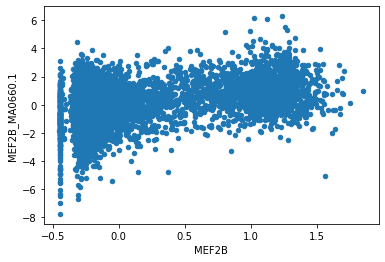

In [407]:
mdf.plot(x = 'MEF2B', y = 'MEF2B_MA0660.1', kind= 'scatter')

In [436]:
ncatlist = []

d= -1 

for g in range(0, 150): 
    d +=1    
    if (corp['spear_pval'][d] < (0.05/150)) & (corp['spear_cor'][d] > 0): 
        ncatlist.append('+ corr')
    elif (corp['spear_pval'][d] < (0.05/150)) & (corp['spear_cor'][d] < 0): 
        ncatlist.append('- corr')
    else: 
        ncatlist.append('no corr')



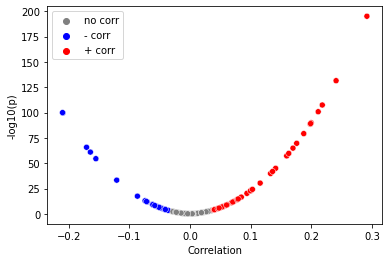

In [437]:
seaplot = sns.scatterplot(data= corp, x = 'spear_cor', y ='neglogp_spear', hue=ncatlist, palette= ['grey', 'blue', 'red'], 
                )

seaplot.set_xlabel('Correlation')
seaplot.set_ylabel('-log10(p)')
plt.savefig('spear3fig.png')

In [419]:
corp['neglogp_spear'] = -np.log10(corp['spear_pval'])
#-np.log10(corp['spear_pval'])

In [420]:
corp

,TF_id,Gene_id,pear_cor,pear_pval,spear_cor,spear_pval,neglogp_spear
0,Arnt_MA0004.1,ARNT,0.004326,6.649428e-01,0.005032,6.144447e-01,0.211517
1,Mecom_MA0029.1,MECOM,-0.035988,3.133754e-04,-0.041090,3.866458e-05,4.412687
2,RORA_MA0071.1,RORA,0.028276,4.635365e-03,0.024054,1.601837e-02,1.795382
3,RORA(var.2)_MA0072.1,RORA,0.041219,3.654111e-05,-0.016992,8.888995e-02,1.051147
4,Sox5_MA0087.1,SOX5,-0.120346,1.162089e-33,-0.121070,4.753165e-34,33.323017
...,...,...,...,...,...,...,...
145,SREBF1(var.2)_MA0829.2,SREBF1,-0.008976,3.688264e-01,-0.022739,2.280277e-02,1.642012
146,TCF7_MA0769.2,TCF7,0.321838,2.547813e-240,0.218039,3.546417e-108,107.450210
147,USF2_MA0526.3,USF2,0.024823,1.293610e-02,0.045942,4.187952e-06,5.377998
148,ZNF263_MA0528.2,ZNF263,0.028363,4.511155e-03,0.047892,1.607889e-06,5.793744


In [443]:
corp[corp['spear_pval'] > (0.05 / 150)]

,TF_id,Gene_id,pear_cor,pear_pval,spear_cor,spear_pval,neglogp_spear
0,Arnt_MA0004.1,ARNT,0.004326,0.664943,0.005032,0.614445,0.211517
2,RORA_MA0071.1,RORA,0.028276,0.004635,0.024054,0.016018,1.795382
3,RORA(var.2)_MA0072.1,RORA,0.041219,0.000037,-0.016992,0.088890,1.051147
5,TBP_MA0108.2,TBP,-0.005105,0.609292,0.000220,0.982450,0.007690
6,HLTF_MA0109.1,HLTF,0.044247,0.000009,0.030245,0.002457,2.609651
...,...,...,...,...,...,...,...
137,MAFF_MA0495.3,MAFF,0.026123,0.008906,0.003073,0.758378,0.120114
140,NR4A1_MA1112.2,NR4A1,0.000400,0.968059,0.003566,0.721080,0.142017
141,PBX2_MA1113.2,PBX2,-0.001579,0.874398,-0.003999,0.688862,0.161868
143,PRDM1_MA0508.3,PRDM1,-0.001312,0.895469,0.018703,0.061131,1.213737


In [ ]:
corp[corp['spear_pval'] > (0.05 / 150)]

In [444]:
corp[corp['spear_pval'] > (0.05 / 150)].to_csv('/corgi/filippe/nocorrs.csv')